In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# loading data
df =pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
# droppping ID column
df.drop(columns='Id', inplace =True)

In [7]:
# Identifying null percentage in features
df_nulls= ((df.isnull().sum()/df.shape[0])*100).round(2).reset_index()
df_nulls.columns =['feature','null_percent']
df_nulls=df_nulls[df_nulls.null_percent >0]
df_nulls.sort_values(by=['null_percent'],ascending=False,inplace=True)
df_nulls

feature  null_percent
71        PoolQC         99.52
73   MiscFeature         96.30
5          Alley         93.77
72         Fence         80.75
56   FireplaceQu         47.26
2    LotFrontage         17.74
57    GarageType          5.55
58   GarageYrBlt          5.55
59  GarageFinish          5.55
62    GarageQual          5.55
63    GarageCond          5.55
31  BsmtExposure          2.60
34  BsmtFinType2          2.60
32  BsmtFinType1          2.53
30      BsmtCond          2.53
29      BsmtQual          2.53
25    MasVnrArea          0.55
24    MasVnrType          0.55
41    Electrical          0.07

In [8]:
# poolqc, miscfeatures and alley have extremely high null percentage, removing them
df.drop(columns =['PoolQC','MiscFeature','Alley'], inplace=True)

In [9]:
# dividing null columns into categorical and continous
null_columns =df.columns[df.isnull().any()]
object_null_columns=[i for i in null_columns if df[i].dtype=='object']
cont_null_columns =[i for i in null_columns if i not in object_null_columns]

In [10]:
# for categorical variables, null value means absense of it, so imputing it with NA- Not Available
for i in object_null_columns:
    df[i] =df[i].fillna('NA')

In [11]:
### Imputing continous variables with medain as they are skewed, based on data describe 
for i in cont_null_columns:
    df[i]= df[i].fillna(df[i].median())

In [12]:
# MSSubClass is a categorical column - converting into str
df['MSSubClass'] =df['MSSubClass'].astype('str')

In [13]:
# Converting Quality Features as continous features, these features have a heirarchy and can be considered as continous 
# Same as Label Encoding
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 })
df['ExterCond'] = df['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['BsmtCond'] = df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['GarageQual'] = df['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['GarageCond'] = df['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

## Exploratory Data Analysis (EDA)

### Analyzing Categorical Variables

In [14]:
cat_features =[i for i in df.columns if df[i].dtype=='object']

In [15]:
# checking value counts of each feature
for i in cat_features:
    print(df[i].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     2

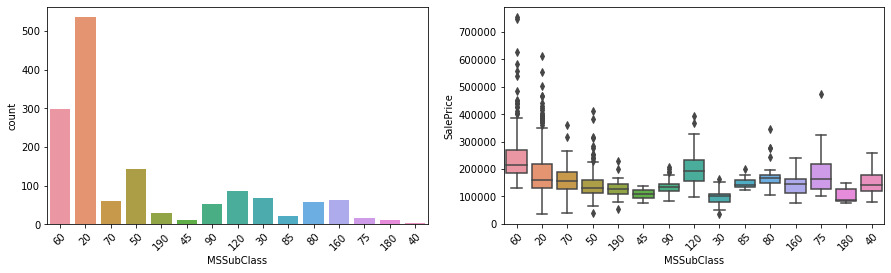

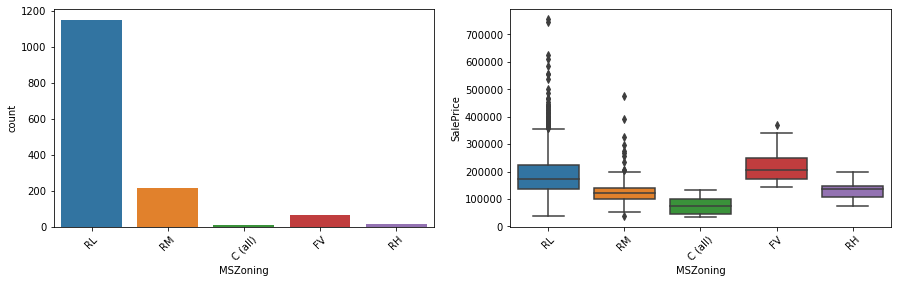

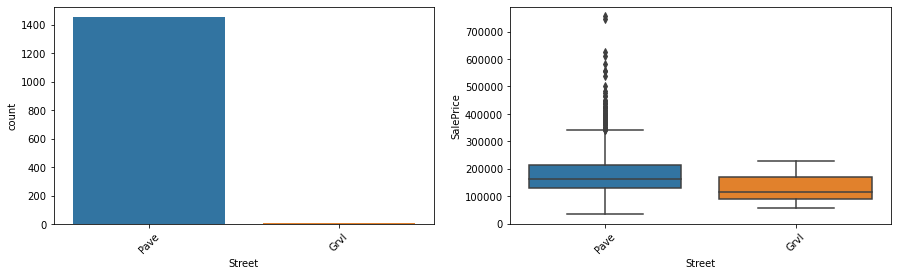

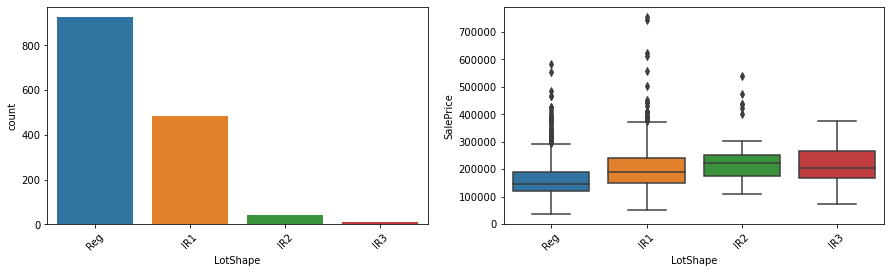

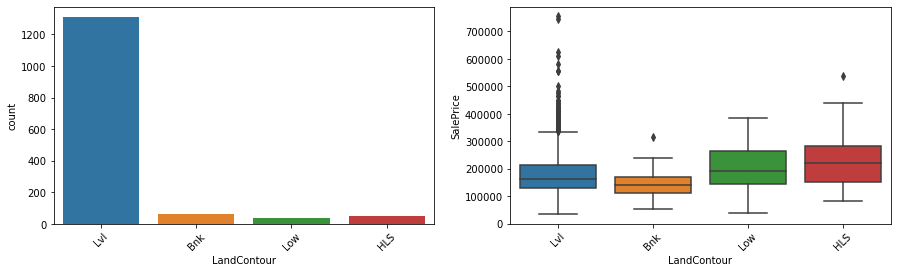

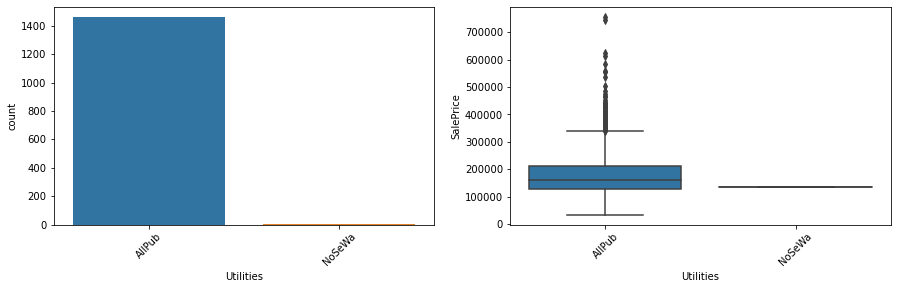

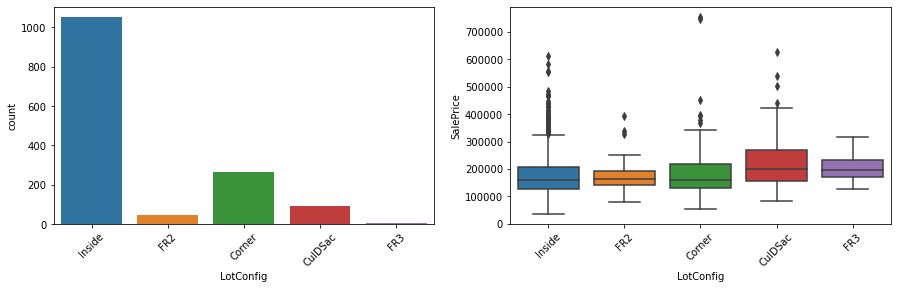

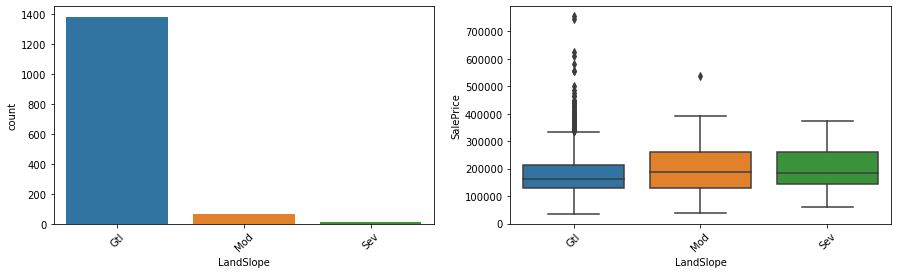

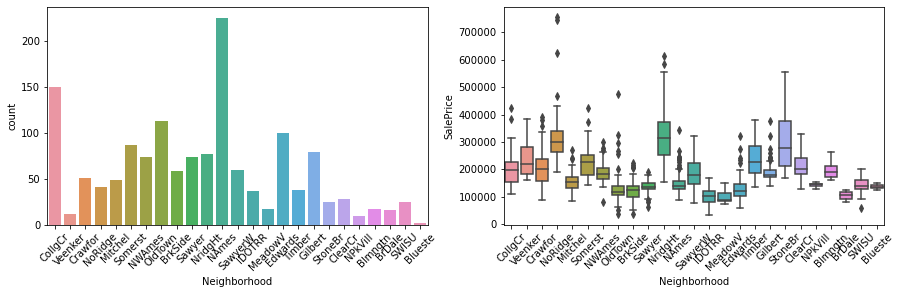

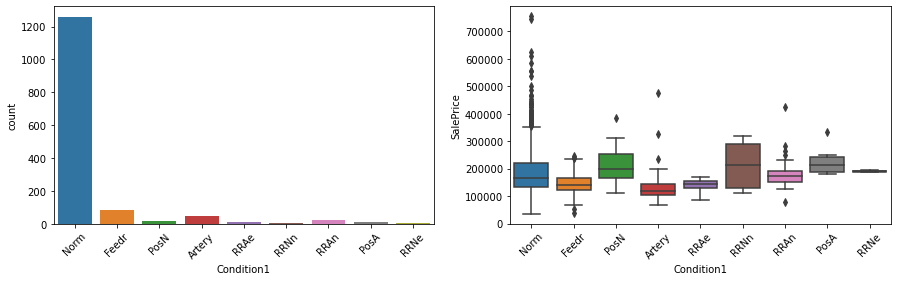

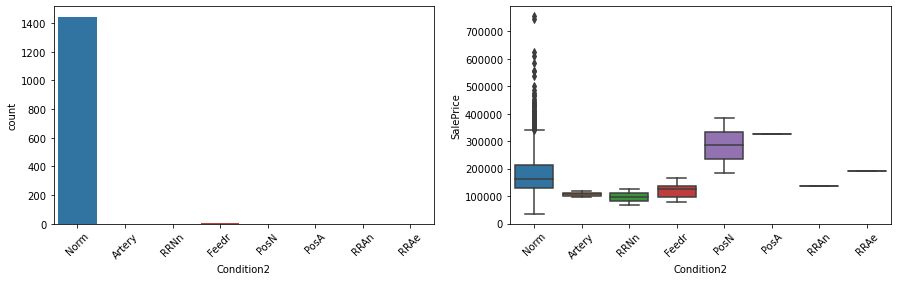

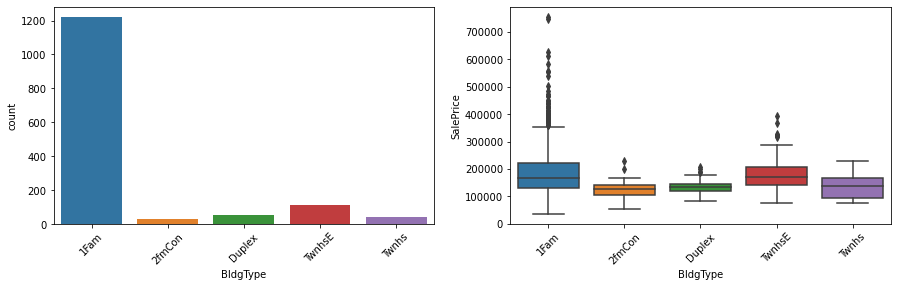

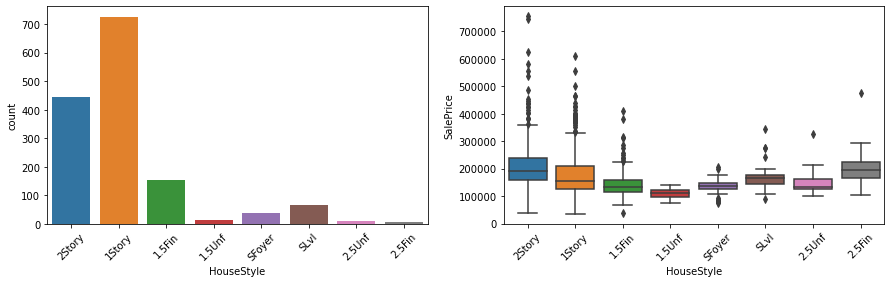

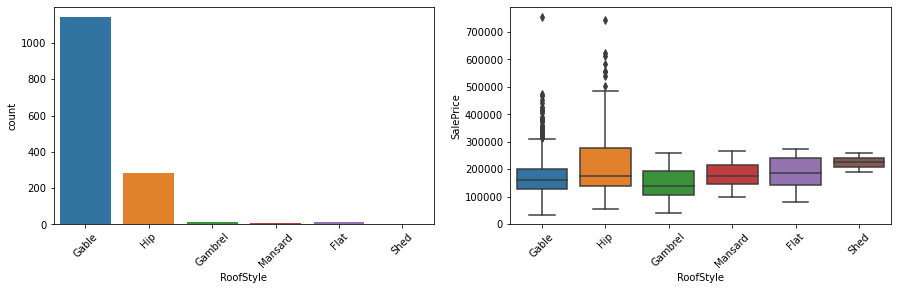

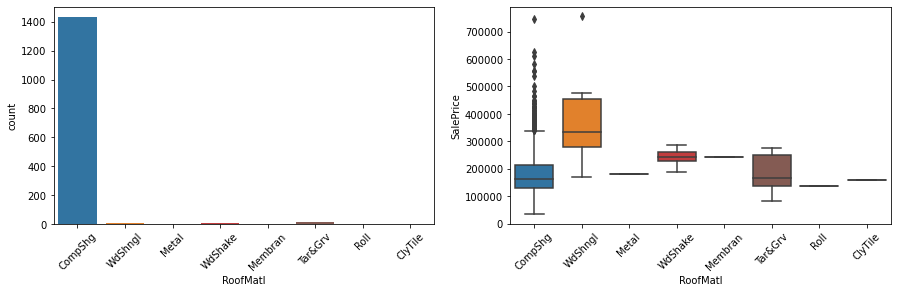

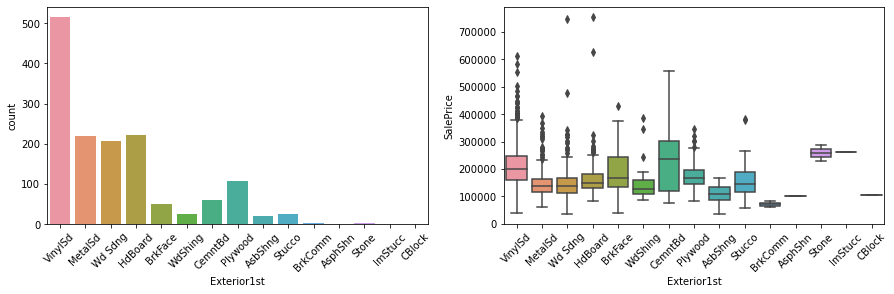

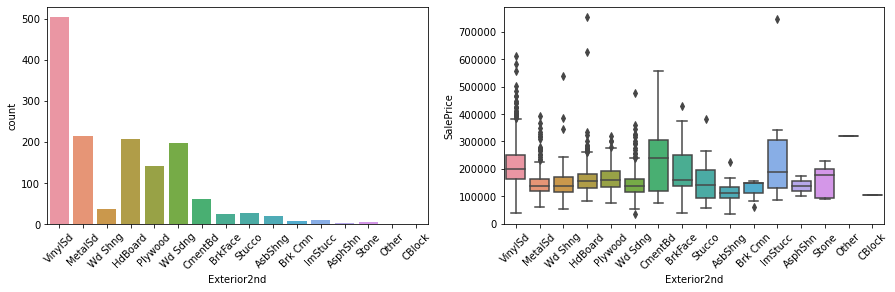

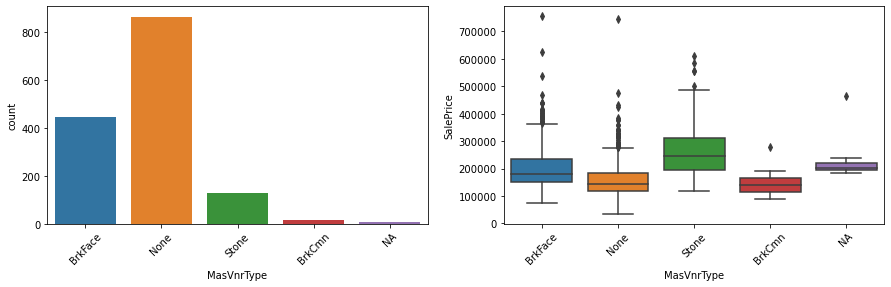

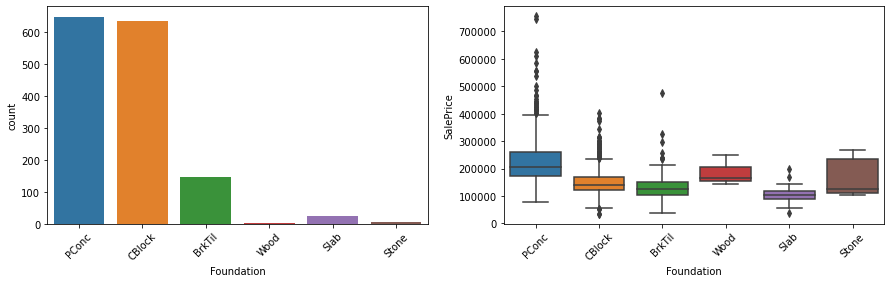

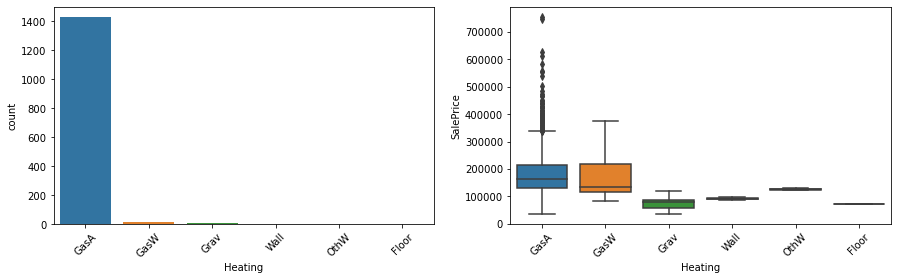

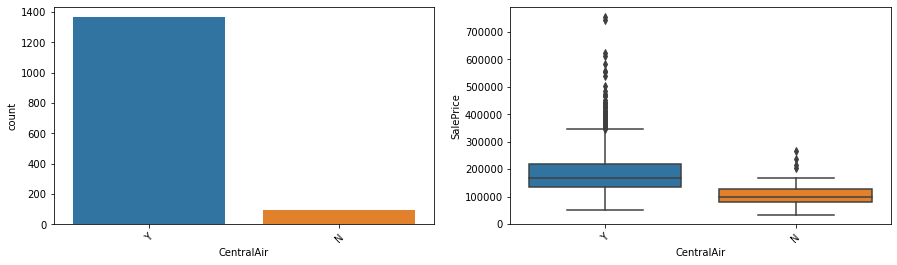

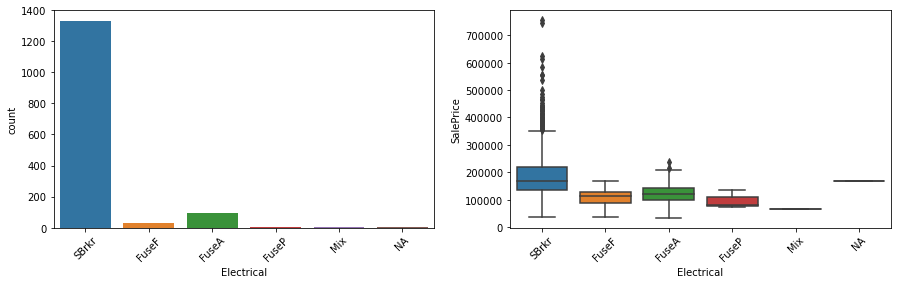

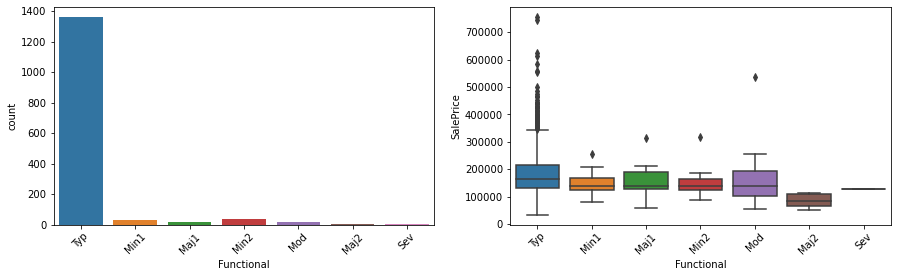

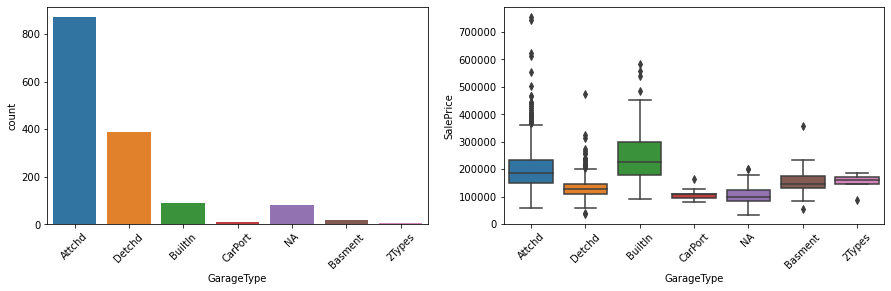

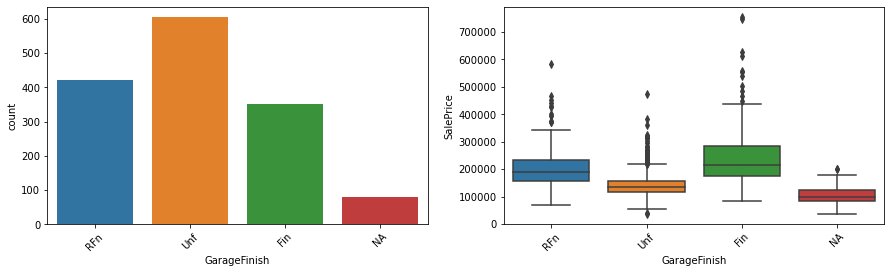

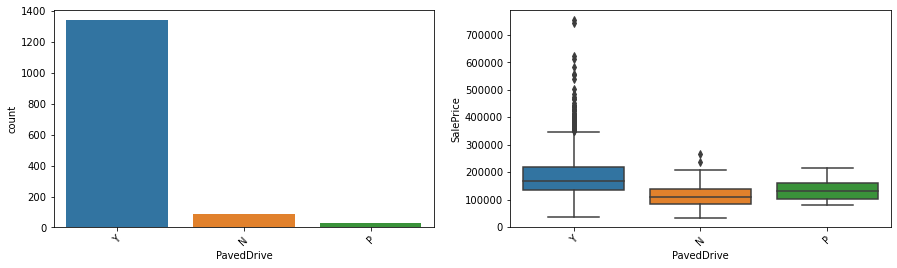

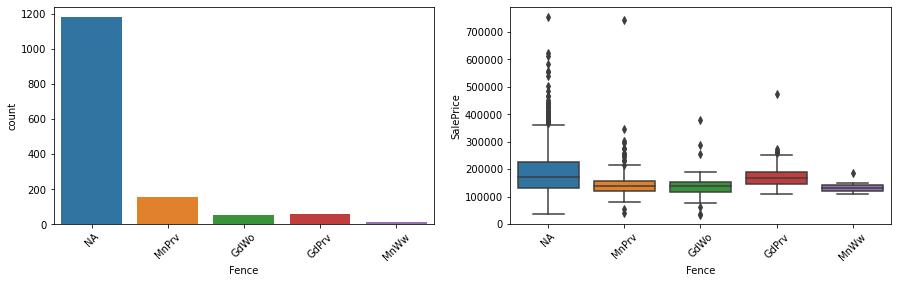

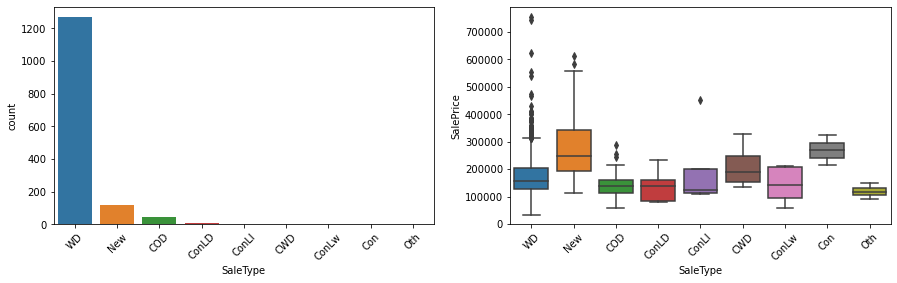

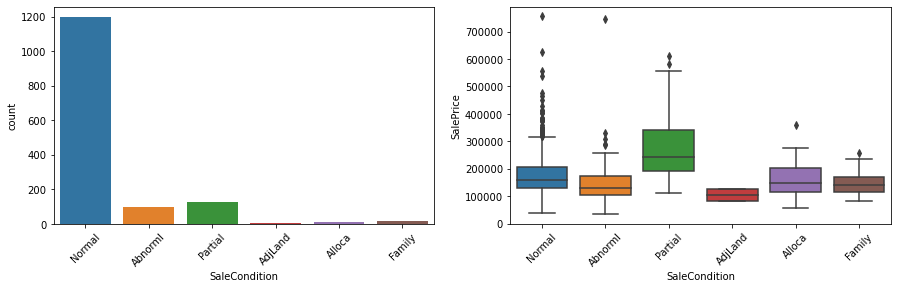

In [16]:
# visualizing categorical features:
# 1. Univariate count plot
# 2. Bivariate boxplot with Target column
for i in cat_features:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.countplot(df[i])
    plt.xticks(rotation =45)
    plt.subplot(1,2,2)
    sns.boxplot(x=i,y='SalePrice',data=df)
    plt.xticks(rotation =45)
    plt.show()

#### Insights:
- MSSubClass- 60,120 and 75 are preffered
- MSZoning- Floating Village have higher pricing
- Loconfig- Cul-de-sac is preferred
- Roofstyle- Hip is preferred
- RoofMaterial- Wood Shingles are highly preferred
- Neighborhood- NridgHt and StoneBr are higher priced
- Exterior1st -CementBed is preferred
- MasVrntype - Stone is preferred
- Good PavedDrive is preferred
- Saletype new is preffered

In [17]:
# dropping the variables with very skewed distribution and very low variance in SalePrice
df.drop(columns=['Street','Utilities','Condition2'], inplace=True)

### Analyzing Continous Variables

In [18]:
cont_vars =[i for i in df.columns if df[i].dtype !='object' ]

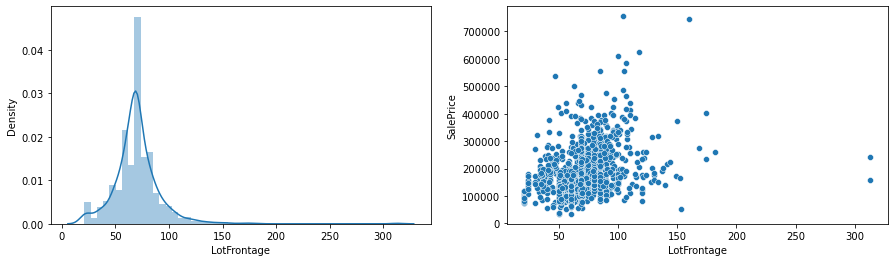

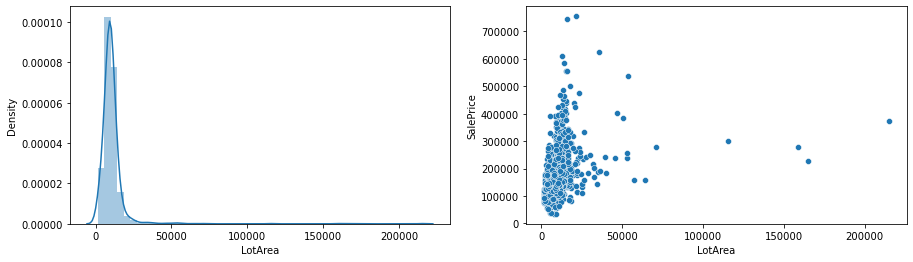

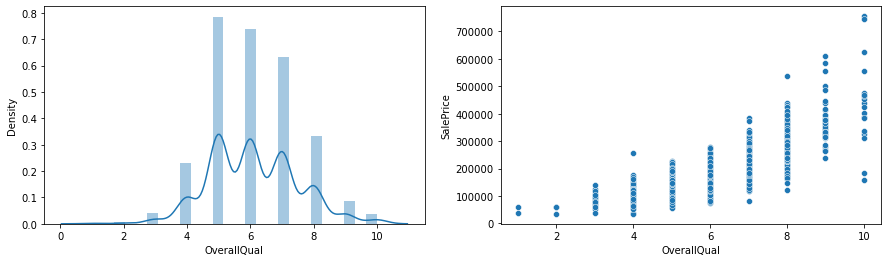

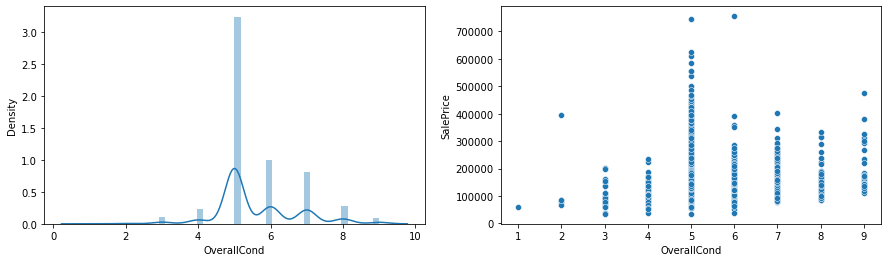

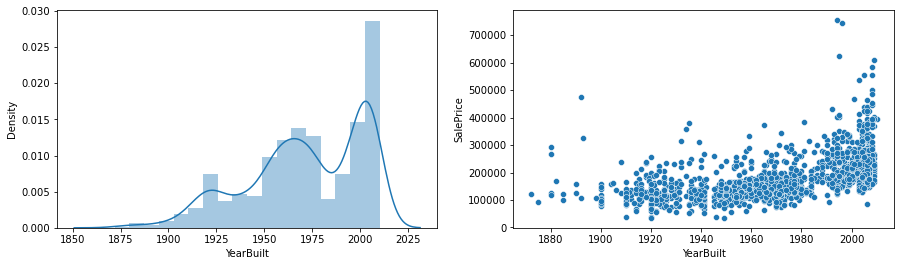

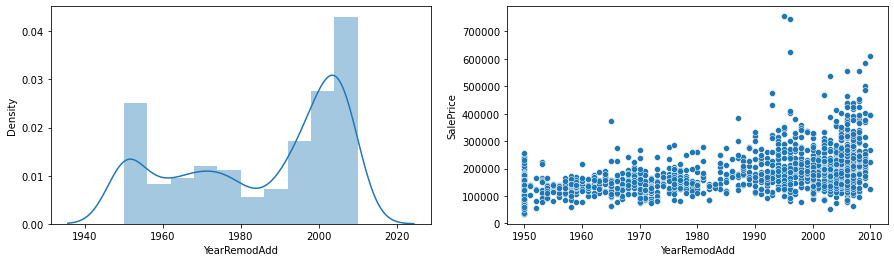

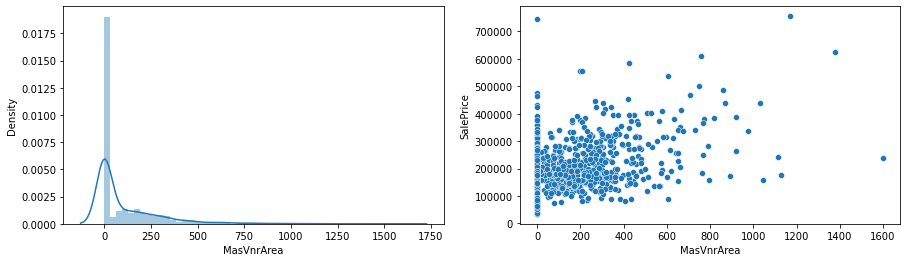

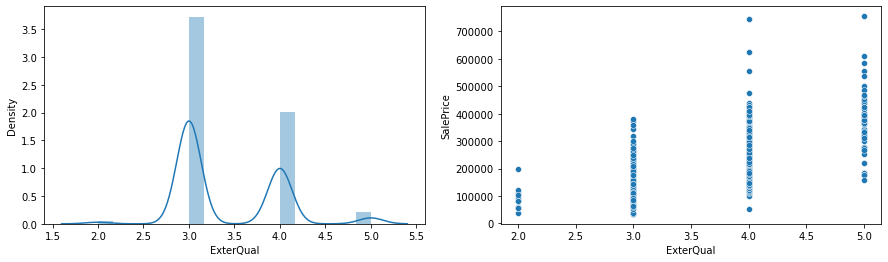

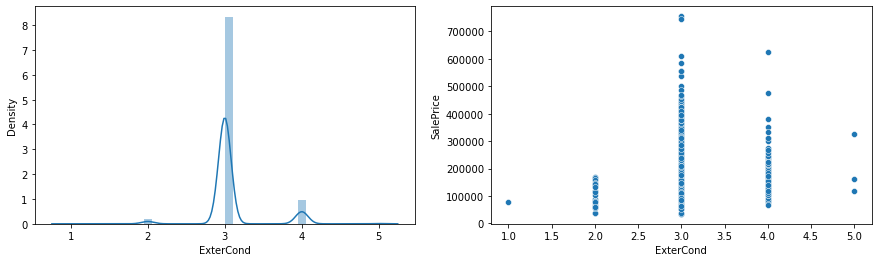

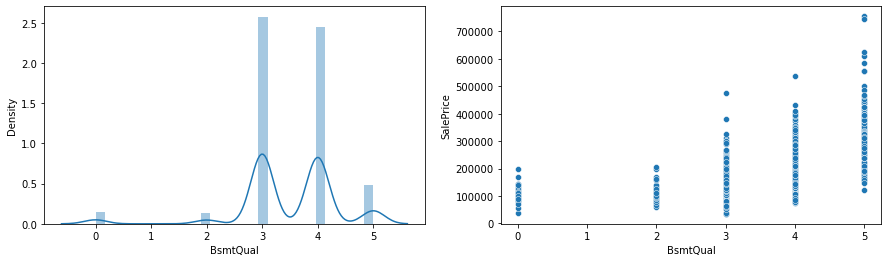

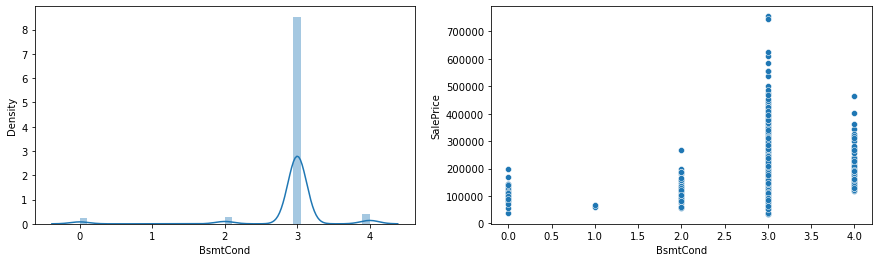

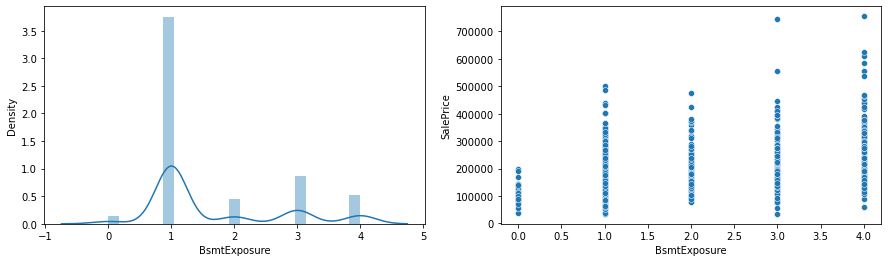

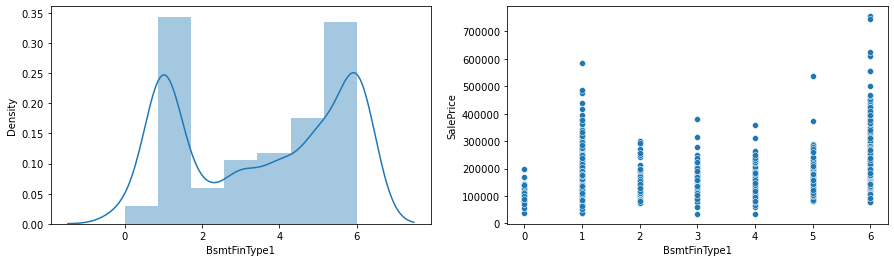

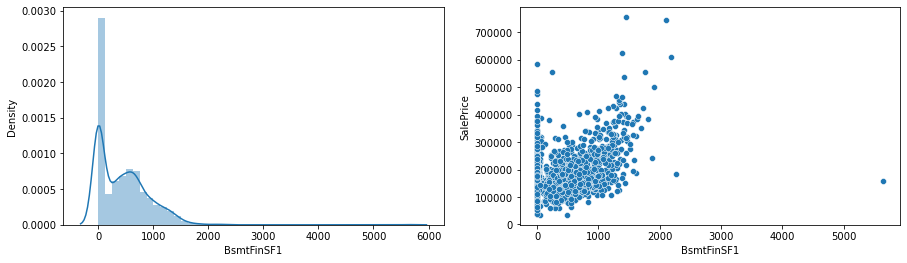

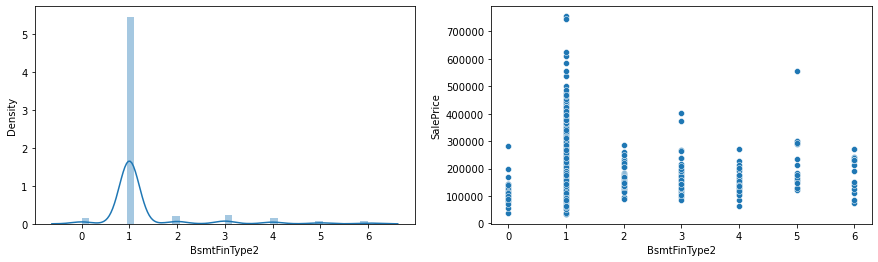

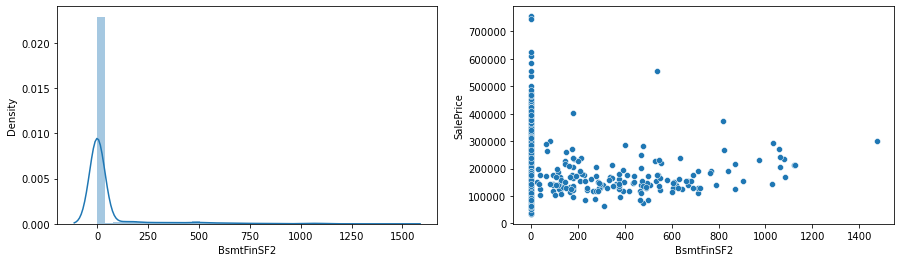

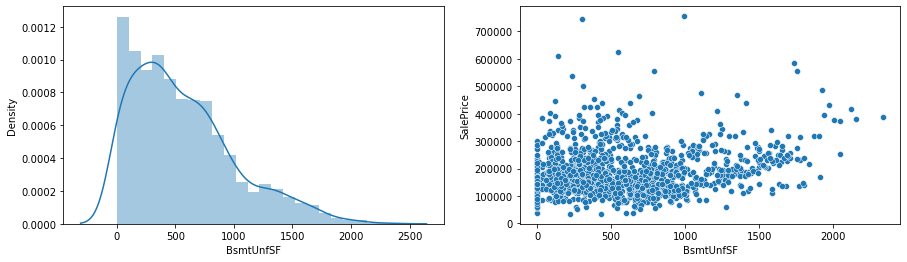

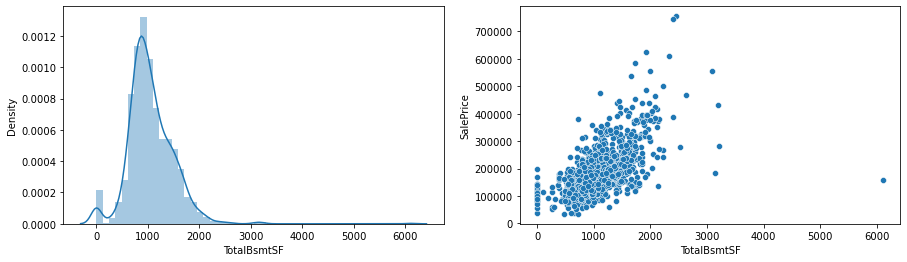

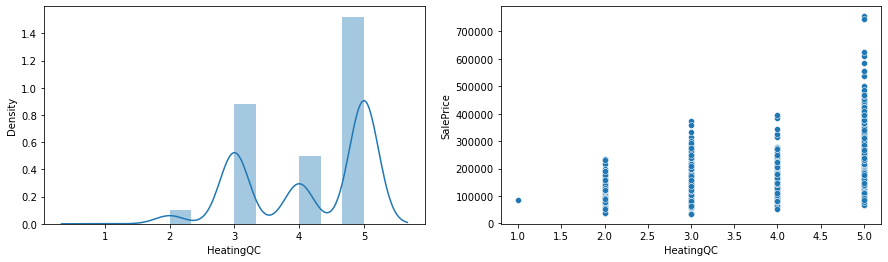

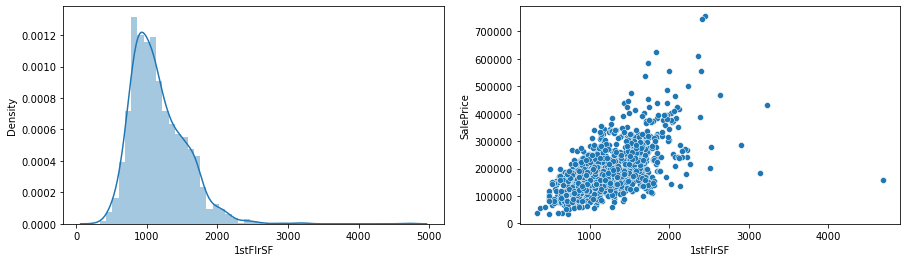

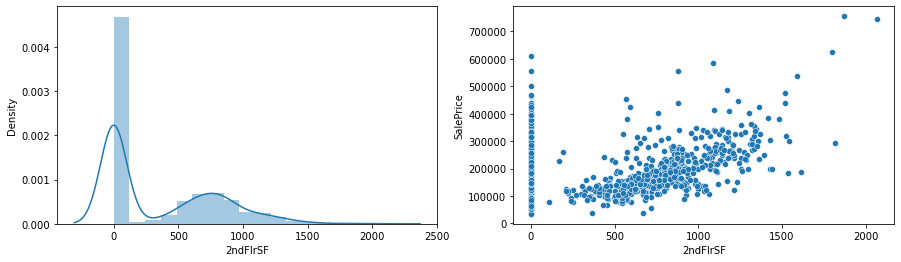

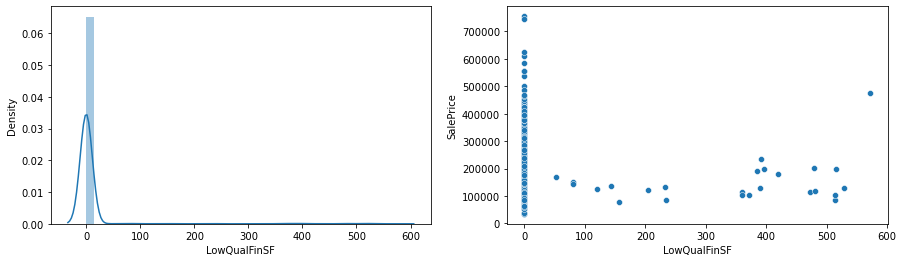

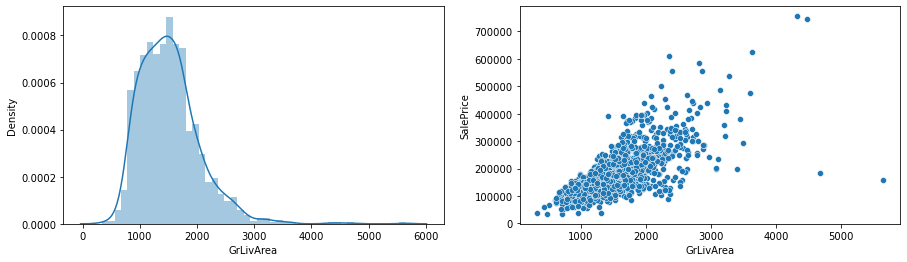

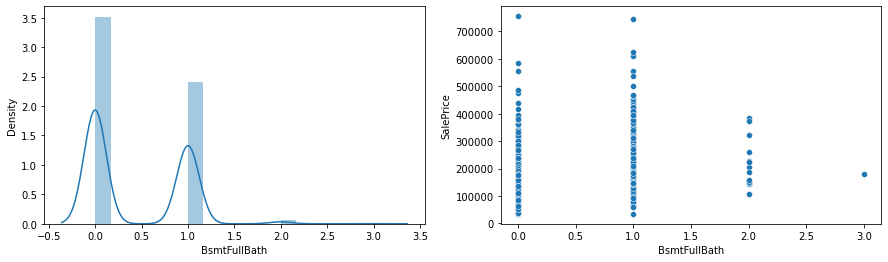

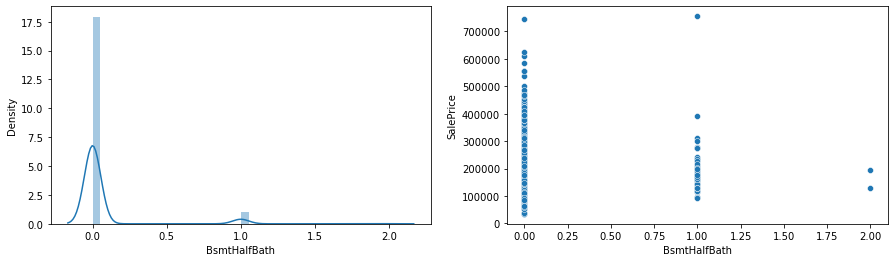

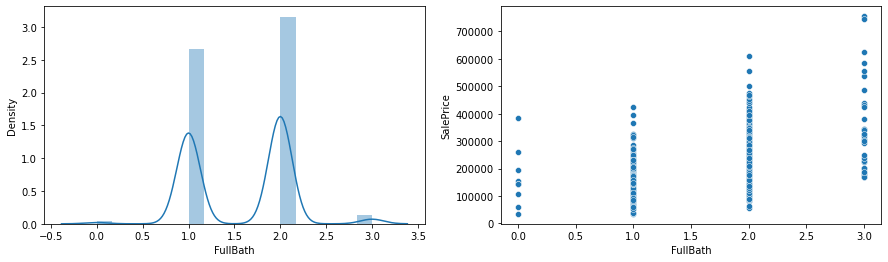

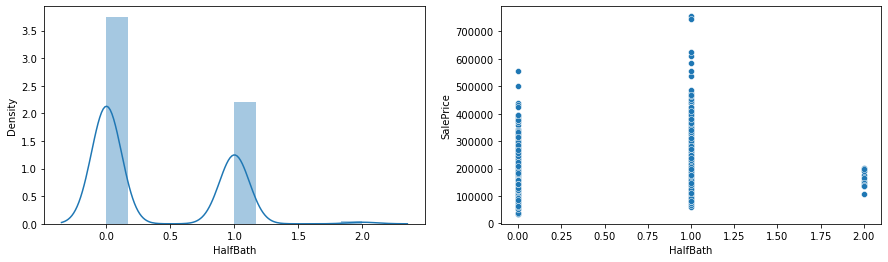

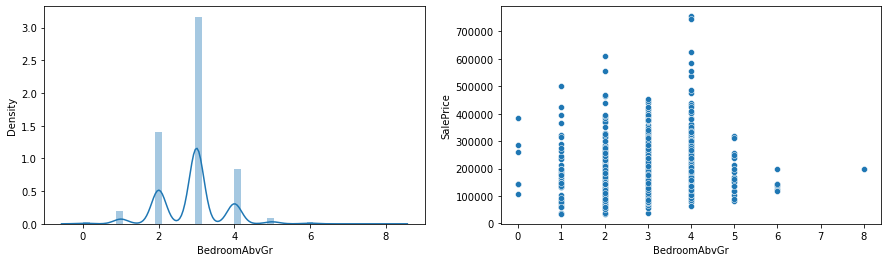

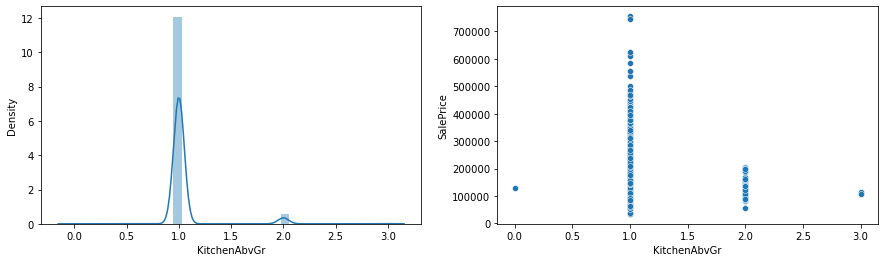

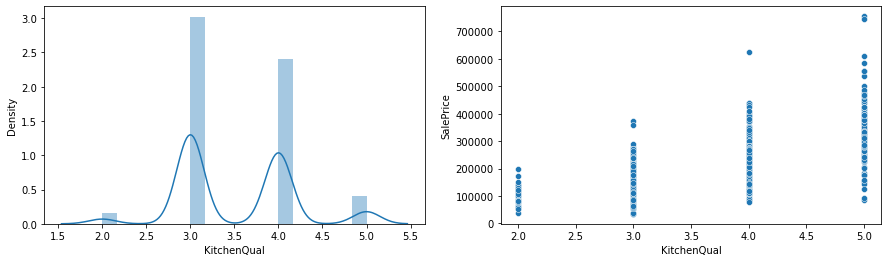

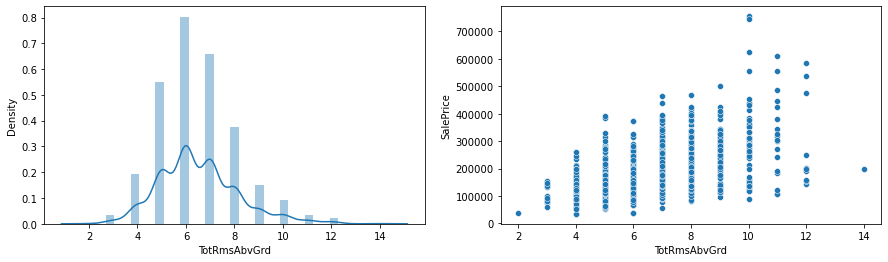

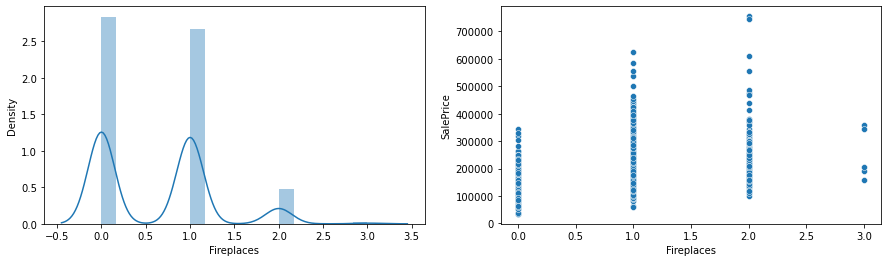

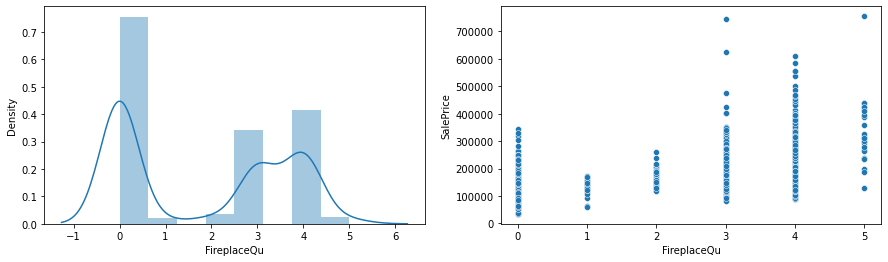

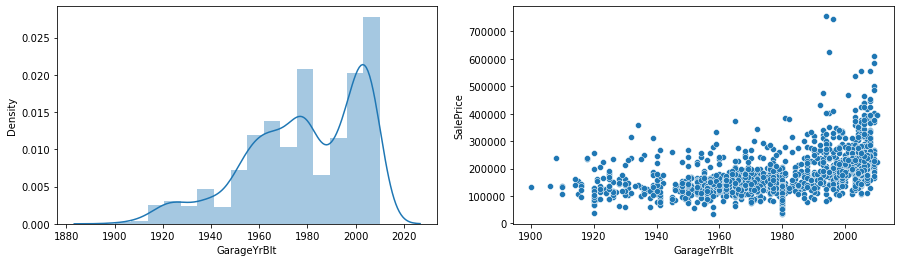

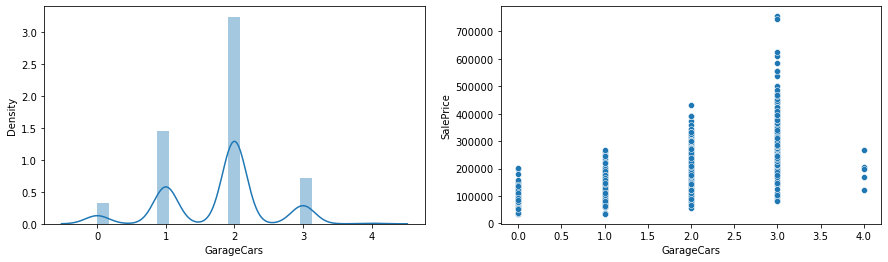

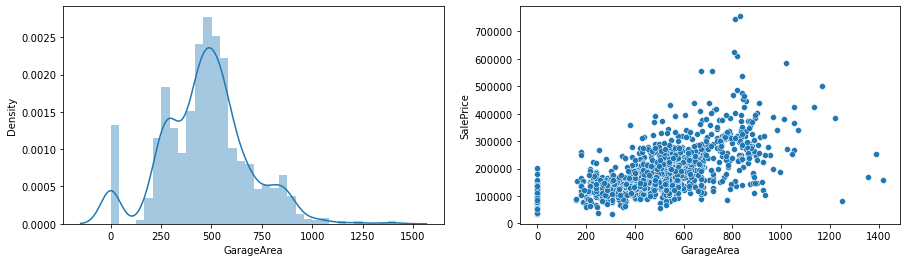

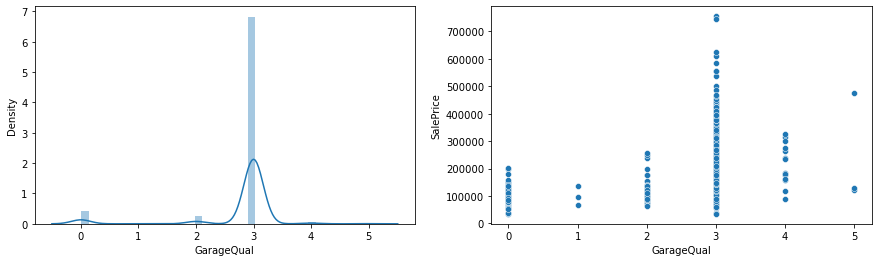

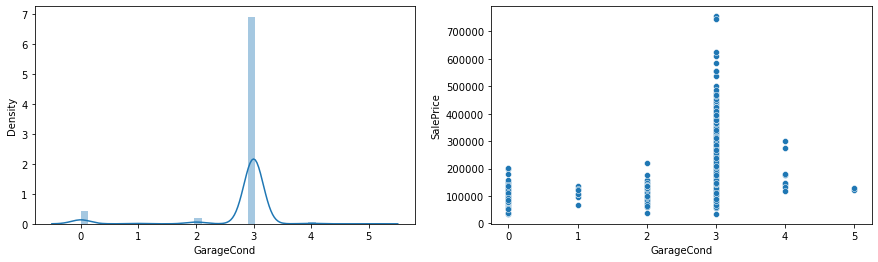

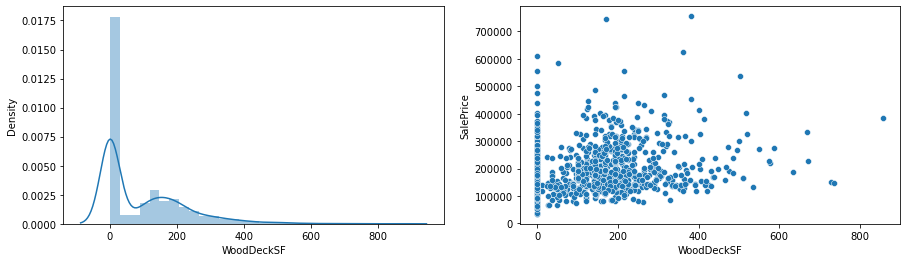

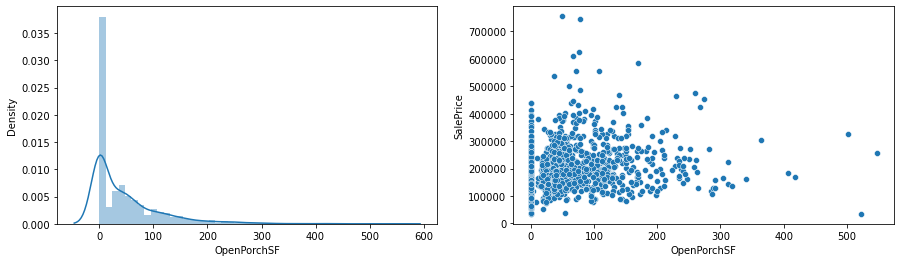

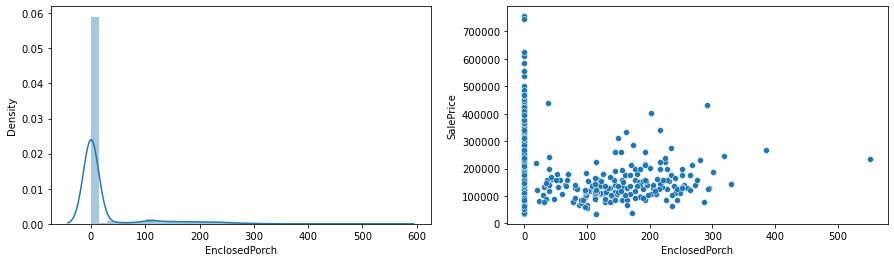

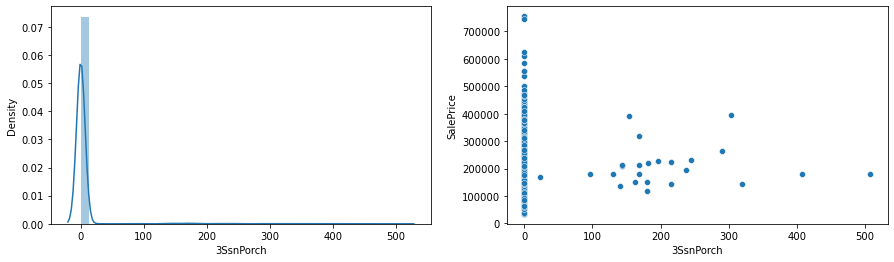

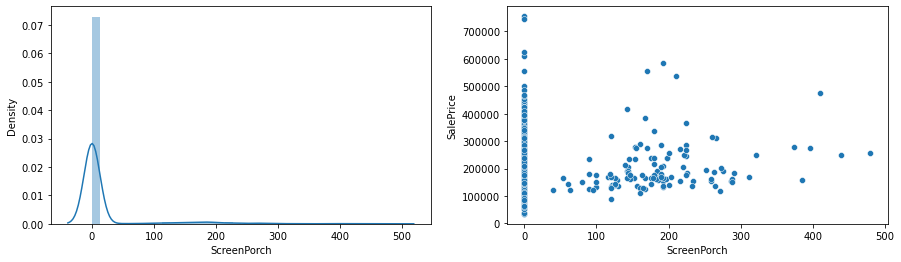

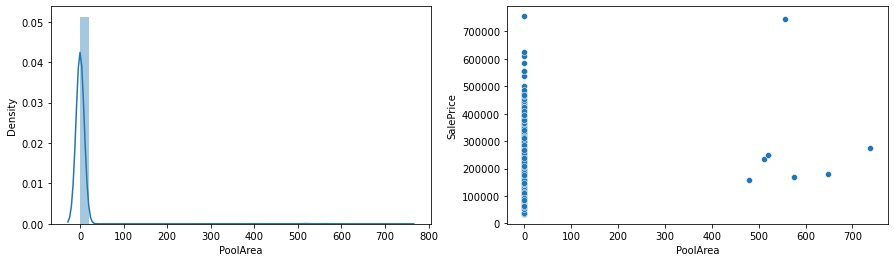

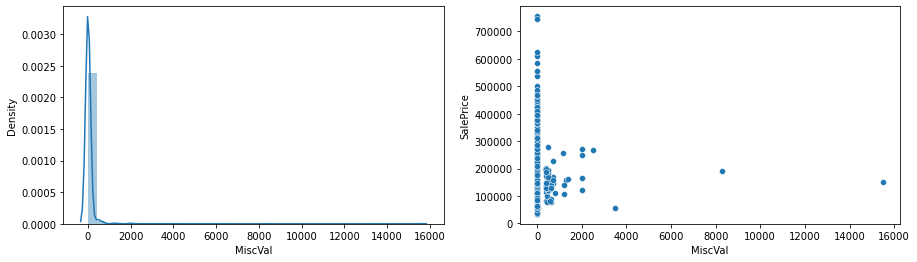

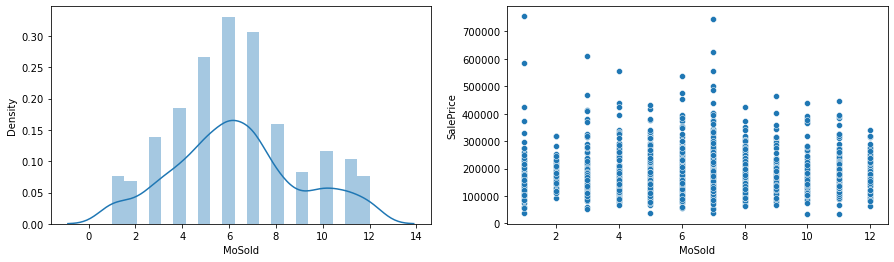

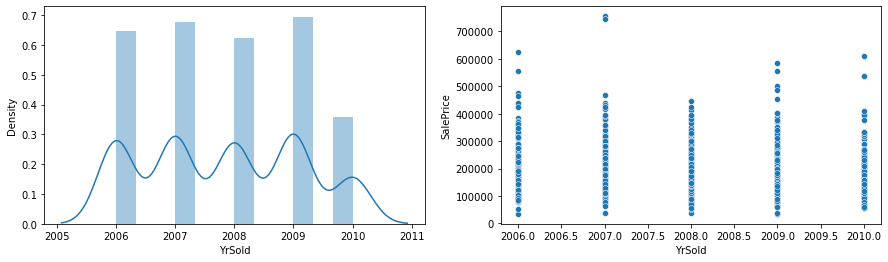

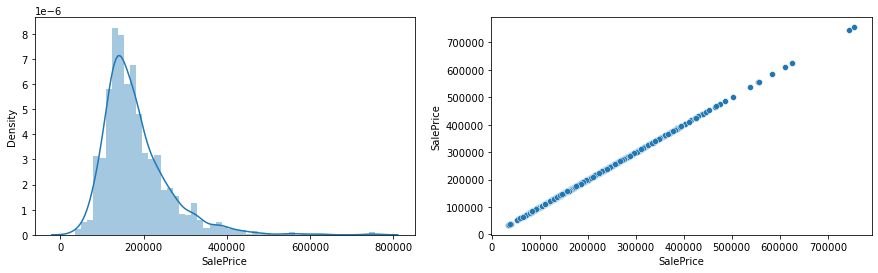

In [19]:
# visualizing continous variables
# 1. Univariate: Histogram plot
# 2. Scatterplot with SalePrice
for i in cont_vars:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.distplot(df[i], kde=True)
    plt.subplot(1,2,2)
    sns.scatterplot(x=i,y='SalePrice',data=df)
    plt.show()

### Insights

- A lot of variables are very skewed, need to be log transformed
- OverallQuality has high correlation with Saleprice
- External Quality has positive correlation with Sale price
- BasementQuality is driving price 
- HeatingQc also impacts Price positively
- 1stFlrSF has positive Corr 
- 2ndFlrSF has positive Corr 
- GrLivArea has positive Corr
- KitchenQual also impacts Price positively
- totalrooms above ground has positive corr

In [20]:
## Dropping columns with no information- most of values 0
df.drop(columns=['PoolArea','MiscVal'],inplace=True)

In [21]:
# Doing log transformation on skewed variables
skewed_features =['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','LowQualFinSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

# Treating outliers for columns not very skewed
outlier_features =['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF']

In [22]:
# log transformation for skewed features
for i in skewed_features:
    df[i] =np.log1p(df[i])

In [23]:
# imputing values over 95% percentile to 95th percentile values in outliers
for i in outlier_features:
    q95 =df[i].quantile(0.95)
    df[i] =df[i].apply(lambda x: x if x<q95 else q95)

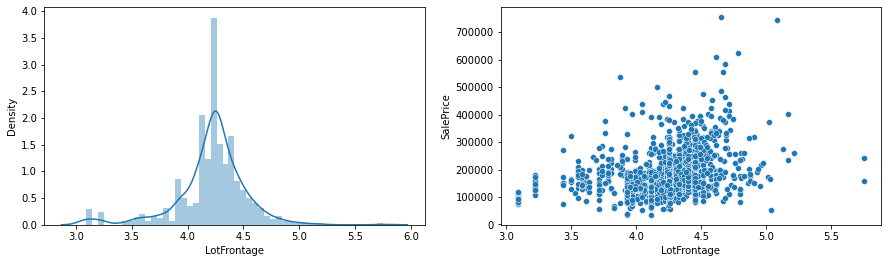

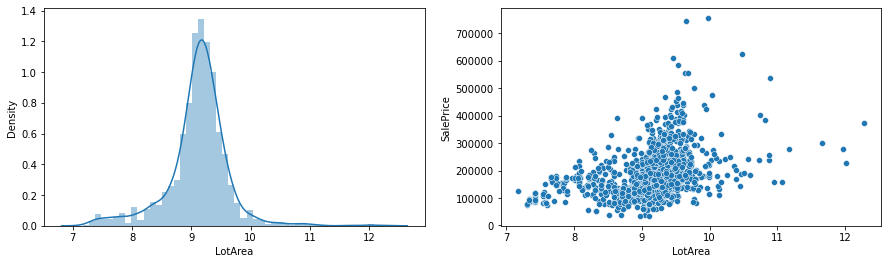

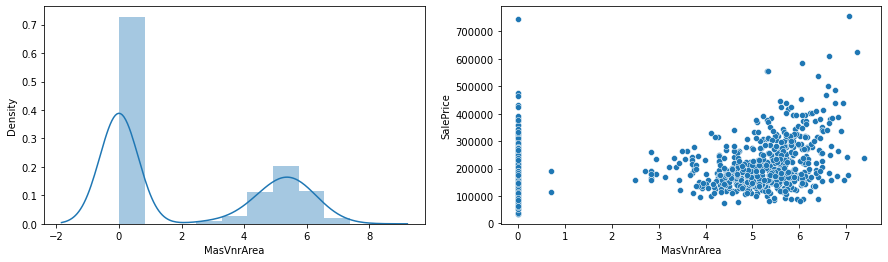

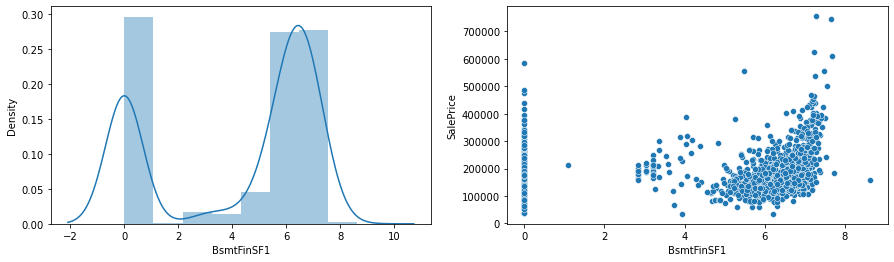

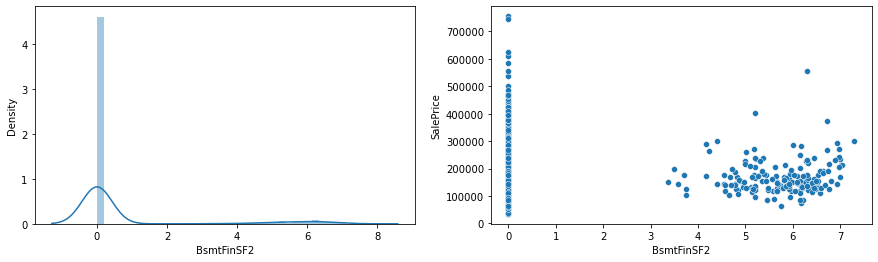

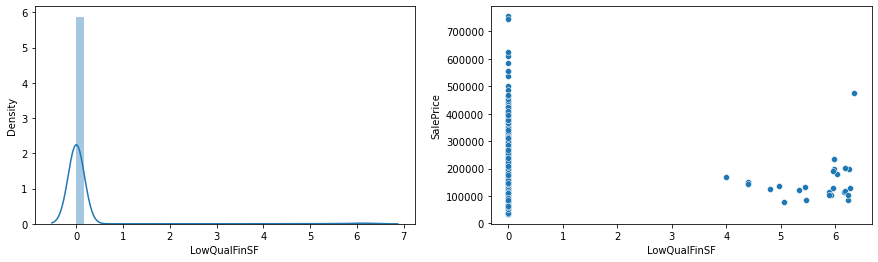

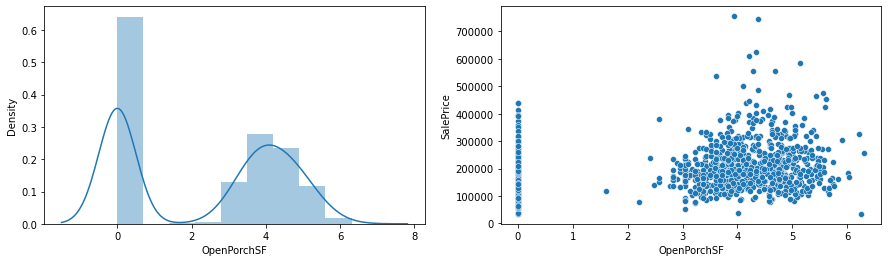

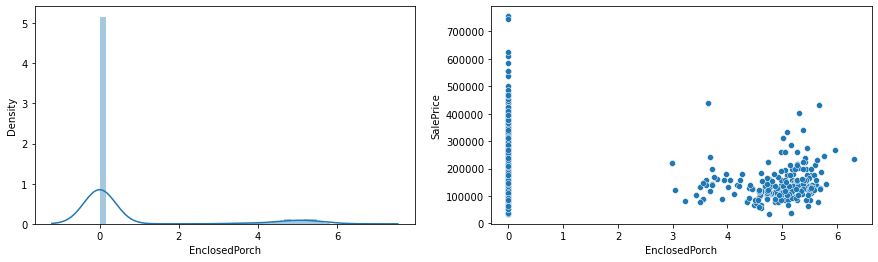

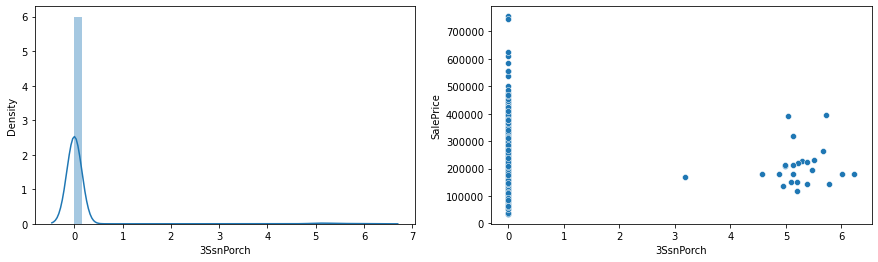

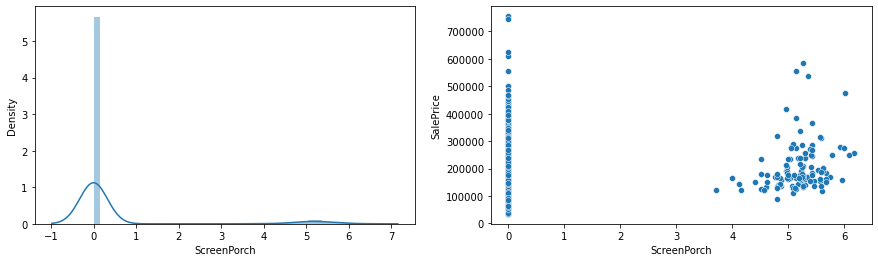

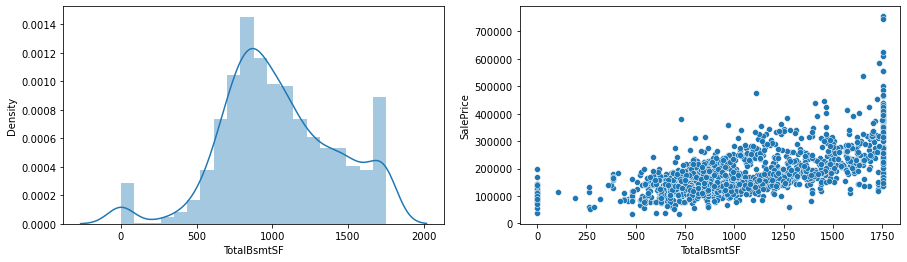

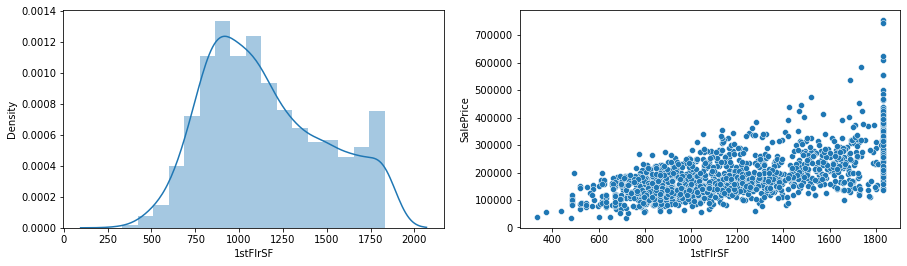

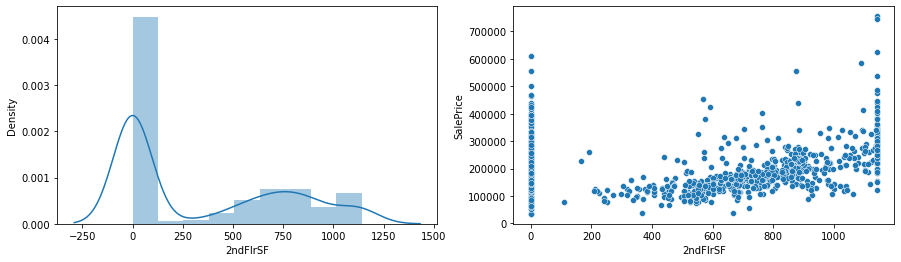

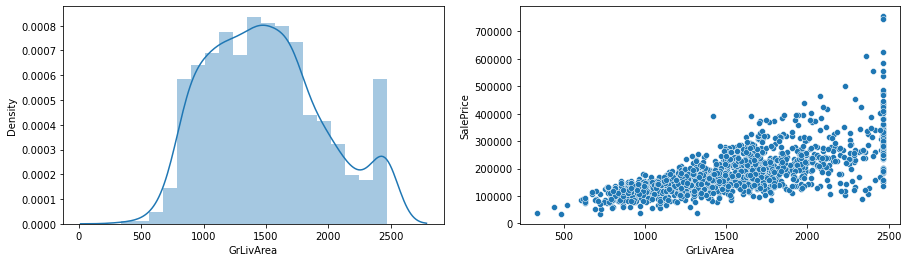

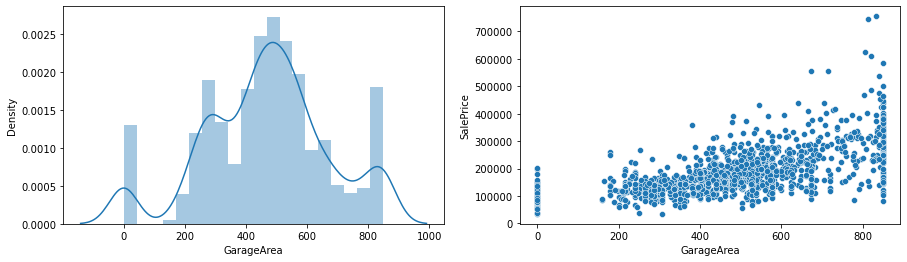

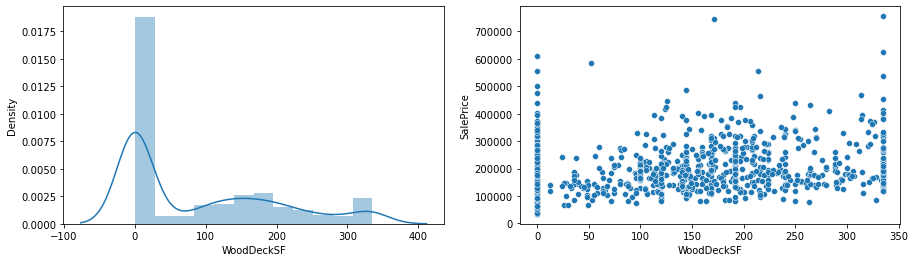

In [24]:
# Again visualizing remaining columns 
cont_columns = skewed_features+outlier_features

for i in cont_columns:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.distplot(df[i], kde=True)
    plt.subplot(1,2,2)
    sns.scatterplot(x=i,y='SalePrice',data=df)
    plt.show()

### Feature Engineering

In [25]:
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df['GarageAge'] = (df.YrSold - df.GarageYrBlt)
df['Remodeled_flag'] = df.apply(lambda x: 1 if x['YearRemodAdd'] != x['YearBuilt'] else 0, axis =1)

In [26]:
df.drop(columns =['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], inplace=True)

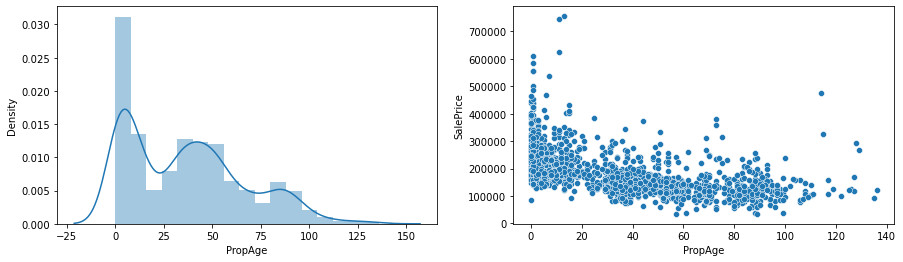

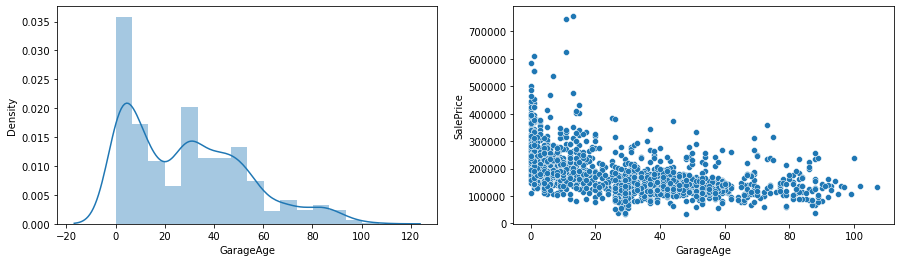

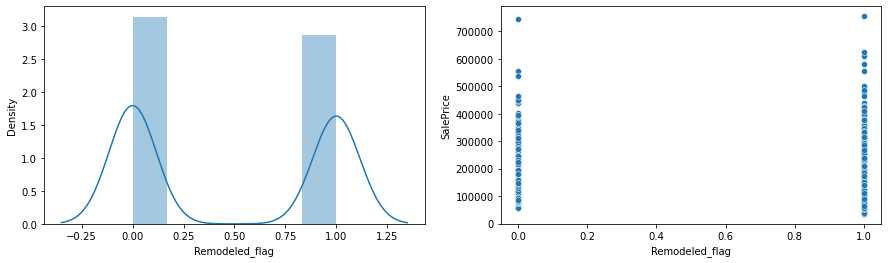

In [27]:
### analyzing new features with Sale Price

new_features =['PropAge','GarageAge','Remodeled_flag']

for i in new_features:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.distplot(df[i], kde=True)
    plt.subplot(1,2,2)
    sns.scatterplot(x=i,y='SalePrice',data=df)
    plt.show()

### Insights

- PropAge and GarageAge has negative correlation with Price
- Remodeled flag do have significant impact

### Bivariate Analysis - Correlation Heatmap

<AxesSubplot:>

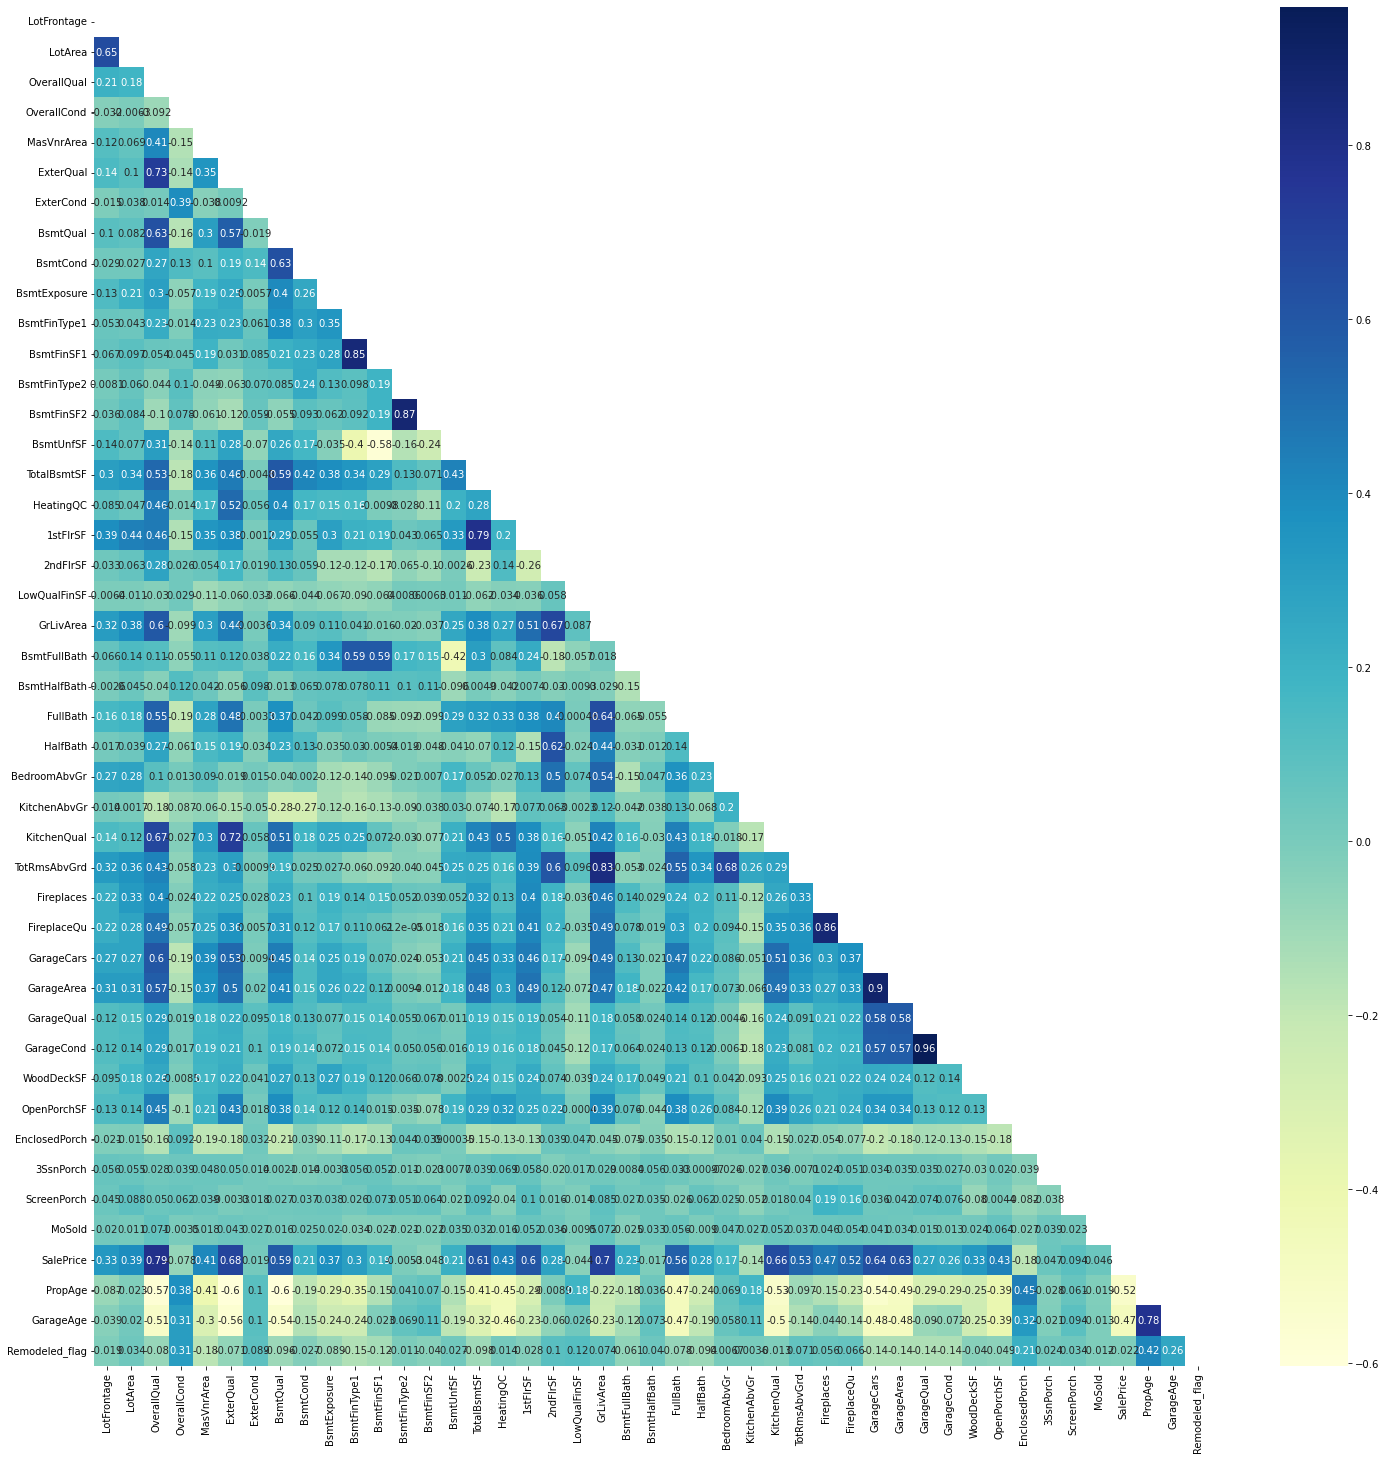

In [30]:
corr = df.corr() 
plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True,mask=mask, cmap='YlGnBu')

In [31]:
## Features with high correlation

# BsmtFinType1 & BsmtFinSF1  (0.85) 
# BsmtFinType2 & BsmtFinSF2 (0.87)
# 'GrLivArea' and 'TotRmsAbvGrd' (0.83) 
# Fireplaces & FireplaceQu (0.86)
# 'GarageCars' and 'GarageArea' (0.88) 
# GarageArea & GarageQual (0.9)
# '1stFlrSF' and 'TotalBsmtSF' (0.82) 
# GarageAge and Prop Age (0.78)

## Removing features with very high correlation and low correlation with Saleprice
df.drop(columns =['BsmtFinSF1','BsmtFinType2','TotRmsAbvGrd','Fireplaces','GarageCars','GarageQual','TotalBsmtSF', 'GarageAge'], inplace=True)


In [32]:
df.shape

(1460, 63)

### Analyzing Target Variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

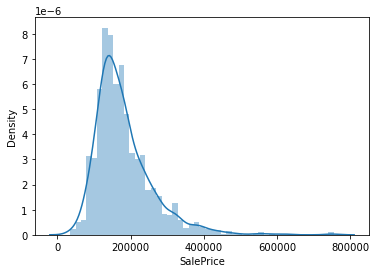

In [33]:
sns.distplot(df['SalePrice'])

In [34]:
# sale price is also quite skewed, log transforming it
df["SalePrice"] = np.log(df["SalePrice"])

### Creating Dummy Variables

In [35]:
cat_columns =[i for i in df.columns if df[i].dtype =='object']

In [36]:
data = pd.get_dummies(df,columns=cat_columns,drop_first=True)

In [37]:
data.shape

(1460, 205)

In [38]:
data.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0     4.189655  9.042040            7            5    5.283204          4   
1     4.394449  9.169623            6            8    0.000000          3   
2     4.234107  9.328212            7            5    5.093750          4   
3     4.110874  9.164401            7            5    0.000000          3   
4     4.442651  9.565284            8            5    5.860786          4   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF2  \
0          3         4         3             1             6         0.0   
1          3         4         3             4             5         0.0   
2          3         4         3             2             6         0.0   
3          3         3         4             1             5         0.0   
4          3         4         3             3             6         0.0   

   BsmtUnfSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          5     856.0     854.0           0.0     1710.0   
1        284          5    1262.0       0.0           0.0     1262.0   
2        434          5     920.0     866.0           0.0     1786.0   
3        540          4     961.0     756.0           0.0     1717.0   
4        490          5    1145.0    1053.0           0.0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  FireplaceQu  GarageArea  GarageCond  WoodDeckSF  OpenPorchSF  \
0            4            0       548.0           3         0.0     4.127134   
1            3            3       460.0           3       298.0     0.000000   
2            4            3       608.0           3         0.0     3.761200   
3            4            4       642.0           3         0.0     3.583519   
4            4            3       836.0           3       192.0     4.442651   

   EnclosedPorch  3SsnPorch  ScreenPorch  MoSold  SalePrice  PropAge  \
0       0.000000        0.0          0.0       2  12.247694        5   
1       0.000000        0.0          0.0       5  12.109011       31   
2       0.000000        0.0          0.0       9  12.317167        7   
3       5.609472        0.0          0.0       2  11.849398       91   
4       0.000000        0.0          0.0      12  12.429216        8   

   Remodeled_flag  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               1               0               0               0   
3               1               0               0               0   
4               0               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1  

### Building Model

In [39]:
y =data.pop('SalePrice')
X=data

In [40]:
y.shape, X.shape

((1460,), (1460, 204))

In [147]:
# Splitting the data into train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, test_size=0.25, random_state= 20)

In [148]:
# Scaling the features 
sc = StandardScaler()

# fit and transform train data
X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])

# transform test data only
X_test[X_test.columns] = sc.transform(X_test[X_test.columns])

### Fitting Linear Regression Model

In [108]:
lr = LinearRegression()
# Selecting top 30 features using RFE
rfe = RFE(estimator=lr,n_features_to_select=30,)
rfe = rfe.fit(X_train, y_train)

In [109]:
all_rfe_features =list(zip(X_train.columns,rfe.support_,rfe.ranking_))
all_rfe_features

[('LotFrontage', False, 55),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 77),
 ('ExterQual', False, 130),
 ('ExterCond', False, 150),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 74),
 ('BsmtExposure', False, 14),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF2', False, 98),
 ('BsmtUnfSF', False, 54),
 ('HeatingQC', False, 2),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 59),
 ('LowQualFinSF', False, 157),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 115),
 ('FullBath', False, 5),
 ('HalfBath', False, 4),
 ('BedroomAbvGr', False, 149),
 ('KitchenAbvGr', False, 6),
 ('KitchenQual', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageArea', True, 1),
 ('GarageCond', False, 86),
 ('WoodDeckSF', False, 35),
 ('OpenPorchSF', False, 84),
 ('EnclosedPorch', False, 80),
 ('3SsnPorch', False, 96),
 ('ScreenPorch', False, 45),
 ('MoSold', False, 87),
 ('PropAge', True, 1),
 ('Remodeled_flag', False, 159),
 ('MSSubClass_

In [110]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinType1',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Condition1_Norm',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_Wd Sdng',
       'Exterior2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Functional_Typ', 'SaleType_New', 'SaleCondition_Normal'],
      dtype='object')

### Fitting model with selected features only

In [46]:
X_train =X_train[rfe_features]
X_test =X_test[rfe_features]

X_train.shape, X_test.shape

((1095, 30), (365, 30))

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [49]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ",r2_test_lr)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print("rmse train: ",rmse_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse test: ",rmse_test)

r2 train:  0.915136418622661
r2 test:  0.8397809471805667
rmse train:  0.11717604596959541
rmse test:  0.15626040727679213


### Insights
- The model has test R2 score of 84% whereas train R2 score is 91%
- Although both the test and train R2 score is good, there is much difference in the train and test R2 score, meaning the model causing overfitting
- The RMSE error is not too high

### Residual Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

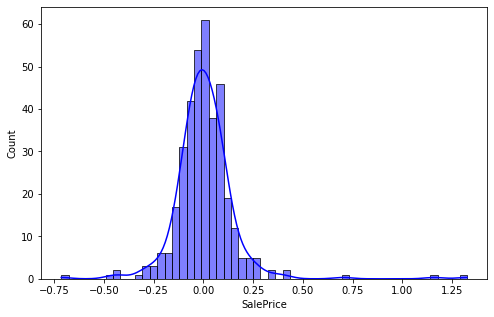

In [50]:
# checking the distribution of error terms
plt.figure(figsize=(8,5))
res = (y_test - y_pred_test)    
sns.histplot(res ,color='b', kde=True)

Text(0, 0.5, 'Residuals')

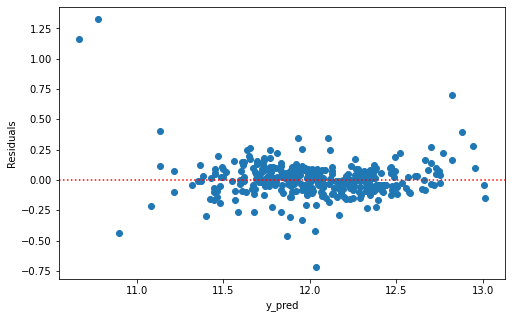

In [51]:
# checking if there's any pattern in residuals
plt.figure(figsize = (8,5))
plt.scatter(y_pred_test, res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("y_pred")
plt.ylabel("Residuals")

Text(0, 0.5, 'y_pred_test')

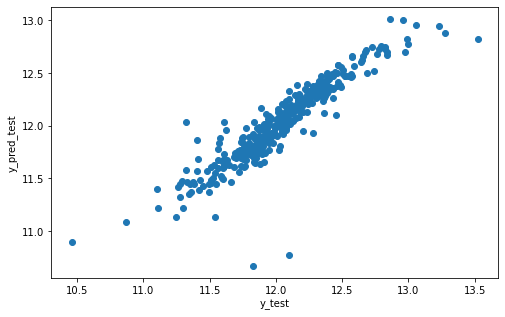

In [52]:
# checking the relation between test data and predictions
plt.figure(figsize = (8,5))
plt.scatter(y_test,y_pred_test)
plt.xlabel('y_test')              
plt.ylabel('y_pred_test') 

### Insights

- The Error terms are normally distributed
- The residuals are distributed randomly around 0
- The model passes test for homoscedasticity 

### Identifying Top features

In [53]:
coeff = pd.DataFrame()
coeff['feature_name'] =X_train.columns
coeff['coeff']= lr.coef_
coeff['coeff_abs']=abs(coeff['coeff'])
coeff.sort_values(by='coeff_abs', ascending=False, inplace=True)
coeff.reset_index(drop=True,inplace=True)

In [54]:
coeff

feature_name     coeff  coeff_abs
0       RoofMatl_CompShg  0.157862   0.157862
1            MSZoning_RL  0.150236   0.150236
2              GrLivArea  0.126442   0.126442
3            MSZoning_RM  0.119506   0.119506
4       RoofMatl_Tar&Grv  0.100301   0.100301
5       RoofMatl_WdShngl  0.094102   0.094102
6            OverallQual  0.088524   0.088524
7            MSZoning_FV  0.080073   0.080073
8       RoofMatl_WdShake  0.069363   0.069363
9                PropAge -0.052571   0.052571
10           OverallCond  0.052311   0.052311
11               LotArea  0.046314   0.046314
12      RoofMatl_Membran  0.042416   0.042416
13            GarageArea  0.042302   0.042302
14              1stFlrSF  0.038240   0.038240
15           MSZoning_RH  0.037124   0.037124
16          SaleType_New  0.034333   0.034333
17      Foundation_PConc  0.032067   0.032067
18   Exterior1st_Wd Sdng -0.028525   0.028525
19           KitchenQual  0.027099   0.027099
20              BsmtQual  0.026547   0.026547
21   Exterior2nd_Wd Sdng  0.025764   0.025764
22          BsmtFinType1  0.024828   0.024828
23  SaleCondition_Normal  0.023896   0.023896
24           FireplaceQu  0.023705   0.023705
25       Condition1_Norm  0.022900   0.022900
26        Functional_Typ  0.021533   0.021533
27  Neighborhood_Crawfor  0.021229   0.021229
28          BsmtFullBath  0.021169   0.021169
29     Foundation_CBlock  0.015150   0.015150

### Applying Regularization

In [55]:
### defining different values for alpha to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,3.0,4.0, 5.0,10,15, 20, 50, 100]}

In [56]:
ridge = Ridge()

#cross validation
folds = 3
model_ridge = GridSearchCV(estimator = ridge,
                       param_grid= params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
model_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 23 candidates, totalling 69 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 10, 15, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
model_ridge.best_params_

{'alpha': 10}

In [58]:
y_pred_train =model_ridge.best_estimator_.predict(X_train)
y_pred_test =model_ridge.best_estimator_.predict(X_test)

In [59]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ",r2_test_lr)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print("rmse train: ",rmse_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse test: ",rmse_test)

r2 train:  0.91399258777678
r2 test:  0.8641585228946138
rmse train:  0.11796307948614006
rmse test:  0.14388253127655856


In [60]:
ridge_coeff =pd.DataFrame()
ridge_coeff['feature_name'] =X_train.columns
ridge_coeff['coeff']= model_ridge.best_estimator_.coef_
ridge_coeff['coeff_abs']=abs(ridge_coeff['coeff'])
ridge_coeff.sort_values(by='coeff_abs', ascending=False, inplace=True)
ridge_coeff.reset_index(drop=True,inplace=True)


In [61]:
ridge_coeff

feature_name     coeff  coeff_abs
0              GrLivArea  0.125082   0.125082
1       RoofMatl_CompShg  0.114834   0.114834
2            MSZoning_RL  0.100359   0.100359
3            OverallQual  0.088298   0.088298
4            MSZoning_RM  0.073669   0.073669
5       RoofMatl_WdShngl  0.072122   0.072122
6       RoofMatl_Tar&Grv  0.070843   0.070843
7            MSZoning_FV  0.056132   0.056132
8                PropAge -0.053795   0.053795
9            OverallCond  0.053570   0.053570
10      RoofMatl_WdShake  0.049673   0.049673
11               LotArea  0.044212   0.044212
12            GarageArea  0.041793   0.041793
13              1stFlrSF  0.039588   0.039588
14          SaleType_New  0.033470   0.033470
15      RoofMatl_Membran  0.032496   0.032496
16      Foundation_PConc  0.030510   0.030510
17           KitchenQual  0.027366   0.027366
18              BsmtQual  0.026435   0.026435
19   Exterior1st_Wd Sdng -0.026132   0.026132
20          BsmtFinType1  0.025146   0.025146
21           MSZoning_RH  0.024789   0.024789
22           FireplaceQu  0.024597   0.024597
23  SaleCondition_Normal  0.024554   0.024554
24   Exterior2nd_Wd Sdng  0.023687   0.023687
25       Condition1_Norm  0.023281   0.023281
26  Neighborhood_Crawfor  0.020902   0.020902
27        Functional_Typ  0.020700   0.020700
28          BsmtFullBath  0.020243   0.020243
29     Foundation_CBlock  0.012870   0.012870

### Insights 

- The test R2 score improved from 84% to 86.4%
- The performance of model improved after ridge regularization 
- The RMSE also decreased
- The distribution of important features also changed

### Lasso Regression

In [62]:
lasso = Lasso()

model_lasso = GridSearchCV(estimator = lasso,
                       param_grid= params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
model_lasso.fit(X_train, y_train)

Fitting 3 folds for each of 23 candidates, totalling 69 fits


GridSearchCV(cv=3, estimator=Lasso(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 10, 15, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
model_lasso.best_params_

{'alpha': 0.001}

In [64]:
print("Lasso Coefficients :", model_lasso.best_estimator_.coef_)

Lasso Coefficients : [ 0.04219793  0.0899076   0.0545139   0.02621634  0.02527231  0.03950052
  0.12637629  0.01965203  0.02607012  0.0238145   0.04112046 -0.05677089
  0.0448199   0.01806789  0.07823479  0.05179429  0.01955088  0.02263207
  0.09873146  0.02822272  0.05950151  0.04185284  0.06400427 -0.01943097
  0.01714335  0.00697007  0.02404577  0.01951201  0.03124796  0.02278912]


In [65]:
y_pred_train =model_lasso.best_estimator_.predict(X_train)
y_pred_test =model_lasso.best_estimator_.predict(X_test)

In [66]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ",r2_test_lr)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print("rmse train: ",rmse_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse test: ",rmse_test)

r2 train:  0.9126177102749058
r2 test:  0.8719187654034405
rmse train:  0.11890219482038653
rmse test:  0.1397122943014193


In [67]:
lasso_coeff =pd.DataFrame()
lasso_coeff['feature_name'] =X_train.columns
lasso_coeff['coeff']= model_lasso.best_estimator_.coef_
lasso_coeff['coeff_abs']=abs(lasso_coeff['coeff'])
lasso_coeff.sort_values(by='coeff_abs', ascending=False, inplace=True)
lasso_coeff.reset_index(drop=True,inplace=True)

In [68]:
lasso_coeff

feature_name     coeff  coeff_abs
0              GrLivArea  0.126376   0.126376
1       RoofMatl_CompShg  0.098731   0.098731
2            OverallQual  0.089908   0.089908
3            MSZoning_RL  0.078235   0.078235
4       RoofMatl_WdShngl  0.064004   0.064004
5       RoofMatl_Tar&Grv  0.059502   0.059502
6                PropAge -0.056771   0.056771
7            OverallCond  0.054514   0.054514
8            MSZoning_RM  0.051794   0.051794
9            MSZoning_FV  0.044820   0.044820
10               LotArea  0.042198   0.042198
11      RoofMatl_WdShake  0.041853   0.041853
12            GarageArea  0.041120   0.041120
13              1stFlrSF  0.039501   0.039501
14          SaleType_New  0.031248   0.031248
15      RoofMatl_Membran  0.028223   0.028223
16              BsmtQual  0.026216   0.026216
17           KitchenQual  0.026070   0.026070
18          BsmtFinType1  0.025272   0.025272
19      Foundation_PConc  0.024046   0.024046
20           FireplaceQu  0.023815   0.023815
21  SaleCondition_Normal  0.022789   0.022789
22       Condition1_Norm  0.022632   0.022632
23          BsmtFullBath  0.019652   0.019652
24  Neighborhood_Crawfor  0.019551   0.019551
25        Functional_Typ  0.019512   0.019512
26   Exterior1st_Wd Sdng -0.019431   0.019431
27           MSZoning_RH  0.018068   0.018068
28   Exterior2nd_Wd Sdng  0.017143   0.017143
29     Foundation_CBlock  0.006970   0.006970

### Insights

- Lasso Regression also improved the test R2 score from 84% to 87%
- The RMSE also descreased
- The distribution of feature importanace also changed

## Conclusion

- Model with Lasso Regularization is working best
- We have selected Lasso model cause it is outperforming the baseline and Rigde model both in terms of test R2 value as well as its RMSE is also minimum. 
- Also the coefficients of Lasso model are relatively lower than Ridge meaning it reduces dependency on top few features
- We finally have created a Linear Regression model that can capture the variance in Sale Price with 82.5% accuracy
- The top 5 predictions for the prices comes out to be:
    ('GrLivArea', 'RoofMatl_CompShg', 'OverallQual', 'MSZoning_RL', 'RoofMatl_WdShngl')
    

### Assignment Questions

#### Q1: Doubling the Ridge and Lasso Coefficients

In [111]:
# default alpha =10

ridge = Ridge(alpha=20)

#fitting the training model
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [112]:
y_pred_train =ridge.predict(X_train)
y_pred_test =ridge.predict(X_test)

In [113]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ",r2_test_lr)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print("rmse train: ",rmse_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse test: ",rmse_test)

r2 train:  0.9381973674329946
r2 test:  0.8819091078430983
rmse train:  0.09999577449739198
rmse test:  0.13415290261154264


In [115]:
ridge_coeff =pd.DataFrame()
ridge_coeff['feature_name'] =X_train.columns
ridge_coeff['coeff']= ridge.coef_
ridge_coeff['coeff_abs']=abs(ridge_coeff['coeff'])
ridge_coeff.sort_values(by='coeff_abs', ascending=False, inplace=True)
ridge_coeff.reset_index(drop=True,inplace=True)


In [116]:
ridge_coeff

feature_name     coeff  coeff_abs
0                GrLivArea  0.079068   0.079068
1         RoofMatl_CompShg  0.072356   0.072356
2                 1stFlrSF  0.064294   0.064294
3              OverallQual  0.058619   0.058619
4              MSZoning_RL  0.056223   0.056223
5         RoofMatl_WdShngl  0.053124   0.053124
6              MSZoning_RM  0.049329   0.049329
7         RoofMatl_Tar&Grv  0.044701   0.044701
8                  PropAge -0.042889   0.042889
9              OverallCond  0.042112   0.042112
10             MSZoning_FV  0.037108   0.037108
11        RoofMatl_WdShake  0.031753   0.031753
12              GarageArea  0.031166   0.031166
13                 LotArea  0.029084   0.029084
14    SaleCondition_Normal  0.026778   0.026778
15        RoofMatl_Membran  0.026505   0.026505
16         Condition1_Norm  0.025985   0.025985
17                FullBath  0.024021   0.024021
18                2ndFlrSF  0.023891   0.023891
19                HalfBath  0.023677   0.023677
20    Neighborhood_NridgHt  0.023045   0.023045
21    Neighborhood_StoneBr  0.022341   0.022341
22        Foundation_PConc  0.020801   0.020801
23            SaleType_New  0.020778   0.020778
24    Neighborhood_Edwards -0.020334   0.020334
25     Neighborhood_IDOTRR -0.018894   0.018894
26             KitchenQual  0.018762   0.018762
27       GarageType_Detchd  0.018486   0.018486
28    Neighborhood_Crawfor  0.018439   0.018439
29            BsmtFinType1  0.017201   0.017201
30       HouseStyle_1.5Unf  0.017094   0.017094
31    Neighborhood_OldTown -0.017046   0.017046
32     Exterior1st_Wd Sdng -0.016856   0.016856
33           MSSubClass_45 -0.016740   0.016740
34             FireplaceQu  0.016396   0.016396
35       GarageType_Attchd  0.016390   0.016390
36             MSZoning_RH  0.016300   0.016300
37            BsmtFullBath  0.016131   0.016131
38          Functional_Typ  0.016048   0.016048
39            CentralAir_Y  0.015530   0.015530
40    Neighborhood_MeadowV -0.014861   0.014861
41     Exterior2nd_Wd Sdng  0.014781   0.014781
42              GarageCond  0.014076   0.014076
43     Exterior1st_BrkFace  0.013859   0.013859
44               HeatingQC  0.013435   0.013435
45          MSSubClass_160 -0.013174   0.013174
46              WoodDeckSF  0.013131   0.013131
47               BsmtUnfSF -0.012880   0.012880
48         LandContour_Lvl  0.012720   0.012720
49            BsmtExposure  0.012536   0.012536
50         Functional_Maj2 -0.012115   0.012115
51             ScreenPorch  0.011989   0.011989
52            Heating_GasW  0.011747   0.011747
53           MSSubClass_70  0.011562   0.011562
54       LotConfig_CulDSac  0.011350   0.011350
55    Neighborhood_NoRidge  0.011279   0.011279
56     Exterior1st_VinylSd  0.011186   0.011186
57     Exterior2nd_CmentBd  0.010783   0.010783
58        GarageFinish_RFn -0.010732   0.010732
59   SaleCondition_Partial  0.010664   0.010664
60         RoofStyle_Gable -0.010088   0.010088
61            Heating_Grav -0.010082   0.010082
62       Foundation_CBlock  0.009855   0.009855
63          SaleType_ConLD  0.009799   0.009799
64            KitchenAbvGr -0.009346   0.009346
65     Exterior2nd_BrkFace -0.009190   0.009190
66           MSSubClass_60 -0.009158   0.009158
67   SaleCondition_AdjLand  0.008984   0.008984
68         LandContour_HLS  0.008981   0.008981
69            LotShape_IR2  0.008912   0.008912
70           MSSubClass_20  0.008849   0.008849
71           LandSlope_Sev -0.008818   0.008818
72                BsmtQual  0.008573   0.008573
73         GarageFinish_NA  0.008485   0.008485
74           GarageType_NA  0.008485   0.008485
75        GarageFinish_Unf -0.008297   0.008297
76          Functional_Sev -0.008158   0.008158
77        LotConfig_Inside -0.008152   0.008152
78       RoofStyle_Gambrel -0.008126   0.008126
79                BsmtCond  0.008077   0.008077
80     Exterior2nd_VinylSd -0.008059   0.008059
81     Exterior1st_CemntBd -0.007985   0.007985
82     Exterior2nd_MetalSd  0.

In [117]:
# default alpha =0.001
lasso = Lasso(alpha =0.002)


#fitting the training model
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [118]:
y_pred_train =lasso.predict(X_train)
y_pred_test =lasso.predict(X_test)

In [119]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ",r2_test_lr)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print("rmse train: ",rmse_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse test: ",rmse_test)

r2 train:  0.9276923560453947
r2 test:  0.9024790290322673
rmse train:  0.10816089356269548
rmse test:  0.1219104348226879


In [120]:
lasso_coeff =pd.DataFrame()
lasso_coeff['feature_name'] =X_train.columns
lasso_coeff['coeff']= lasso.coef_
lasso_coeff['coeff_abs']=abs(lasso_coeff['coeff'])
lasso_coeff.sort_values(by='coeff_abs', ascending=False, inplace=True)
lasso_coeff.reset_index(drop=True,inplace=True)

In [121]:
lasso_coeff

feature_name     coeff  coeff_abs
0                GrLivArea  0.109066   0.109066
1              OverallQual  0.071013   0.071013
2                 1stFlrSF  0.048437   0.048437
3              OverallCond  0.043913   0.043913
4                  PropAge -0.042010   0.042010
5               GarageArea  0.029142   0.029142
6                  LotArea  0.027464   0.027464
7             SaleType_New  0.023764   0.023764
8          Condition1_Norm  0.020992   0.020992
9     Neighborhood_NridgHt  0.020659   0.020659
10                HalfBath  0.020323   0.020323
11        RoofMatl_WdShngl  0.020273   0.020273
12    Neighborhood_Crawfor  0.019501   0.019501
13    SaleCondition_Normal  0.019209   0.019209
14            BsmtFinType1  0.019128   0.019128
15                FullBath  0.019064   0.019064
16             KitchenQual  0.017650   0.017650
17    Neighborhood_StoneBr  0.017487   0.017487
18             FireplaceQu  0.016821   0.016821
19          Functional_Typ  0.016632   0.016632
20                BsmtQual  0.014644   0.014644
21     Neighborhood_IDOTRR -0.014576   0.014576
22            BsmtFullBath  0.014464   0.014464
23               HeatingQC  0.013958   0.013958
24            CentralAir_Y  0.013628   0.013628
25    Neighborhood_Edwards -0.013062   0.013062
26    Neighborhood_MeadowV -0.012425   0.012425
27        Foundation_PConc  0.012282   0.012282
28         Functional_Maj2 -0.010534   0.010534
29     Exterior1st_BrkFace  0.010523   0.010523
30        RoofMatl_CompShg  0.010432   0.010432
31            BsmtExposure  0.010298   0.010298
32             ScreenPorch  0.010115   0.010115
33    Neighborhood_NoRidge  0.010085   0.010085
34       LotConfig_CulDSac  0.010055   0.010055
35             MSZoning_FV  0.009609   0.009609
36              WoodDeckSF  0.009561   0.009561
37    Neighborhood_Somerst  0.009432   0.009432
38               BsmtUnfSF -0.008852   0.008852
39             MSZoning_RL  0.008677   0.008677
40         LandContour_Lvl  0.008675   0.008675
41            KitchenAbvGr -0.008314   0.008314
42        RoofMatl_Membran  0.007651   0.007651
43            Heating_GasW  0.007557   0.007557
44          MSSubClass_160 -0.007272   0.007272
45     Exterior2nd_BrkFace -0.007109   0.007109
46    Neighborhood_ClearCr  0.007058   0.007058
47            Heating_Grav -0.006746   0.006746
48          Functional_Sev -0.006428   0.006428
49         LandContour_HLS  0.006225   0.006225
50                BsmtCond  0.006015   0.006015
51     Exterior1st_Wd Sdng -0.005806   0.005806
52            LotShape_IR2  0.005657   0.005657
53              GarageCond  0.005657   0.005657
54            LotShape_IR3 -0.005524   0.005524
55        MasVnrType_Stone  0.005523   0.005523
56       RoofStyle_Gambrel -0.005480   0.005480
57     Exterior1st_HdBoard -0.005476   0.005476
58         Condition1_RRAe -0.005281   0.005281
59             LotFrontage  0.005120   0.005120
60           LandSlope_Mod  0.005042   0.005042
61         Foundation_Wood -0.004965   0.004965
62    Neighborhood_OldTown -0.004774   0.004774
63     Exterior1st_BrkComm -0.004643   0.004643
64           MSSubClass_70  0.004577   0.004577
65           MSSubClass_20  0.004551   0.004551
66      GarageType_CarPort -0.004483   0.004483
67   SaleCondition_AdjLand  0.003937   0.003937
68    Neighborhood_Mitchel -0.003930   0.003930
69        LotConfig_Inside -0.003869   0.003869
70    Neighborhood_BrkSide  0.003718   0.003718
71            PavedDrive_Y  0.003694   0.003694
72         Condition1_PosN -0.003663   0.003663
73          SaleType_ConLD  0.003536   0.003536
74           MSSubClass_30 -0.003521   0.003521
75        RoofMatl_WdShake  0.003514   0.003514
76          Functional_Mod -0.003306   0.003306
77                  MoSold -0.003105   0.003105
78         Condition1_RRAn  0.003033   0.003033
79        GarageFinish_RFn -0.003001   0.003001
80        Condition1_Feedr -0.002899   0.002899
81       HouseStyle_2.5Unf  0.002888   0.002888
82         RoofStyle_Gable -0.

### Q3: Removing Top 5 features from the model

In [149]:
X_train.shape

(1095, 204)

In [150]:
X_train.drop(columns =['GrLivArea', 'RoofMatl_CompShg', 'OverallQual', 'MSZoning_RL', 'RoofMatl_WdShngl'], inplace=True)

In [151]:
X_test.drop(columns =['GrLivArea', 'RoofMatl_CompShg', 'OverallQual', 'MSZoning_RL', 'RoofMatl_WdShngl'], inplace=True)

In [152]:
X_train.shape

(1095, 199)

In [153]:
lr = LinearRegression()
# Selecting top 30 features using RFE
rfe = RFE(estimator=lr,n_features_to_select=30,)
rfe = rfe.fit(X_train, y_train)

In [154]:
all_rfe_features =list(zip(X_train.columns,rfe.support_,rfe.ranking_))
all_rfe_features

[('LotFrontage', False, 148),
 ('LotArea', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 90),
 ('ExterQual', False, 81),
 ('ExterCond', False, 152),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 76),
 ('BsmtExposure', False, 6),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF2', False, 111),
 ('BsmtUnfSF', False, 84),
 ('HeatingQC', False, 38),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 88),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 121),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 134),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageArea', True, 1),
 ('GarageCond', True, 1),
 ('WoodDeckSF', False, 40),
 ('OpenPorchSF', False, 63),
 ('EnclosedPorch', False, 49),
 ('3SsnPorch', False, 113),
 ('ScreenPorch', False, 30),
 ('MoSold', False, 77),
 ('PropAge', True, 1),
 ('Remodeled_flag', False, 120),
 ('MSSubClass_160', False, 14),
 ('MSSubClass_180', False, 112),
 ('MSSu

In [155]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['LotArea', 'OverallCond', 'BsmtQual', 'BsmtFinType1', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'KitchenQual', 'FireplaceQu', 'GarageArea', 'GarageCond', 'PropAge',
       'MSSubClass_60', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Exterior1st_Wd Sdng',
       'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'Functional_Typ',
       'GarageFinish_NA', 'SaleType_New', 'SaleCondition_Normal'],
      dtype='object')

In [156]:
len(rfe_features)

30

### Fitting model with selected features only

In [158]:
X_train =X_train[rfe_features]
X_test =X_test[rfe_features]

X_train.shape, X_test.shape

((1095, 30), (365, 30))

In [159]:
lr.fit(X_train,y_train)

LinearRegression()

In [160]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [161]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ",r2_test_lr)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print("rmse train: ",rmse_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse test: ",rmse_test)

r2 train:  0.8977257542001488
r2 test:  0.8791034418195027
rmse train:  0.12863563770503092
rmse test:  0.13573718568204665


In [162]:
coeff = pd.DataFrame()
coeff['feature_name'] =X_train.columns
coeff['coeff']= lr.coef_
coeff['coeff_abs']=abs(coeff['coeff'])
coeff.sort_values(by='coeff_abs', ascending=False, inplace=True)
coeff.reset_index(drop=True,inplace=True)

In [163]:
coeff

feature_name     coeff  coeff_abs
0               1stFlrSF  0.149062   0.149062
1               2ndFlrSF  0.118880   0.118880
2                PropAge -0.068514   0.068514
3            OverallCond  0.058658   0.058658
4                LotArea  0.041933   0.041933
5             GarageArea  0.038398   0.038398
6            KitchenQual  0.035561   0.035561
7           SaleType_New  0.032701   0.032701
8             GarageCond  0.032178   0.032178
9               BsmtQual  0.031995   0.031995
10           FireplaceQu  0.029686   0.029686
11        Functional_Typ  0.028836   0.028836
12  SaleCondition_Normal  0.028401   0.028401
13      Foundation_PConc  0.027978   0.027978
14       GarageFinish_NA  0.026951   0.026951
15              FullBath  0.026769   0.026769
16   Exterior2nd_Wd Sdng  0.025738   0.025738
17              HalfBath  0.024518   0.024518
18          KitchenAbvGr -0.023867   0.023867
19          BsmtFinType1  0.023770   0.023770
20   Exterior1st_Wd Sdng -0.023469   0.023469
21  Neighborhood_NridgHt  0.023085   0.023085
22       Condition1_Norm  0.023017   0.023017
23  Neighborhood_MeadowV -0.022653   0.022653
24  Neighborhood_StoneBr  0.022369   0.022369
25  Neighborhood_Crawfor  0.021232   0.021232
26   Neighborhood_IDOTRR -0.020948   0.020948
27          BsmtFullBath  0.019674   0.019674
28  Neighborhood_Edwards -0.019543   0.019543
29         MSSubClass_60 -0.019210   0.019210

In [164]:
# Applying Lasso Regularization

In [165]:
lasso = Lasso()

model_lasso = GridSearchCV(estimator = lasso,
                       param_grid= params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
model_lasso.fit(X_train, y_train)

Fitting 3 folds for each of 23 candidates, totalling 69 fits


GridSearchCV(cv=3, estimator=Lasso(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 10, 15, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
model_lasso.best_params_

{'alpha': 0.001}

In [167]:
y_pred_train =model_lasso.best_estimator_.predict(X_train)
y_pred_test =model_lasso.best_estimator_.predict(X_test)

In [168]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ",r2_test_lr)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print("rmse train: ",rmse_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse test: ",rmse_test)

r2 train:  0.897124399389072
r2 test:  0.8805476835085085
rmse train:  0.12901326103833322
rmse test:  0.13492398512999337


In [169]:
lasso_coeff =pd.DataFrame()
lasso_coeff['feature_name'] =X_train.columns
lasso_coeff['coeff']= model_lasso.best_estimator_.coef_
lasso_coeff['coeff_abs']=abs(lasso_coeff['coeff'])
lasso_coeff.sort_values(by='coeff_abs', ascending=False, inplace=True)
lasso_coeff.reset_index(drop=True,inplace=True)

In [170]:
lasso_coeff.head()

feature_name     coeff  coeff_abs
0     1stFlrSF  0.149605   0.149605
1     2ndFlrSF  0.113056   0.113056
2      PropAge -0.066867   0.066867
3  OverallCond  0.058515   0.058515
4      LotArea  0.039766   0.039766